<center><H1>Areas of Population Growth<H1/></center>

<p>As  I was working with the Census Data, I wanted to know about the  individual counties that grew the largest from the 2000 Census, to the  2010 Census. Looking at the raw data, this turned out to give me some  rather large bumps along the way. I did a lot of polishing, and roughing  it through the data to turn out what I have today.</p>

<p>I  thought I would be able to show a few graphs and that would be enough, I  learned that I wasn’t going to be able to show so few graphs.  The image sizes would have to be quite large and show too much  information to display in single static images.  I learned that  the best way to do this would be images by individual states.  It is  also important to note that the range of values displayed in each state  plot,  redefined for the individual State.</p>

<p>I had already done maps of the entire 50 states by County, according  to the population of the 2000, and 2010 Census. My base for this had  already been set, and I had a solid footing working in this data. I  would like to expand this to include the 1990 Census, but that poses  some other issues, that I only began to scratch the surface of.</p>

<p>I  will start at the beginning to show how I got started with this data. I  am currently enrolled in Lambda School, and one week our goal was to  produce graphs. I wanted to challenge myself, and deal with a dataset  that contained a large amount of data. I ended up working with Census  data on a County level, and visualizing it with a coloropleth map.</p>

<p>The  first graph I did turned out quite well.  The Census data came from the Census FactFinder website  (<a href = 'https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml'> factfinder.census.gov </a>).  When I changed the data over to the 2010 Census, I vkly saw I  had a big problem. Turns out The 2010 Census Data, had to be cleaned.  When looking at the data, I noticed that each population variable was a  string, not an integer value. I investigated further, and found some of  the values had parantheses in them. I wrote a little function to clean  these values up, and even though I had never used the apply function in a  pandas dataframe before, it worked for me without a hitch. (Just  beginners Luck) The Function code and my process is below.</p>

<p>The first thing we do, is get all of our imports, function definitions, data declarations and other beginning stuff taken care of.
this is all located here, instead of seperate files, because while it is quite modular, it is all quite essential to this specific project.</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import adjustText as aT

#Setting max rows and Columns for the Pandas Dataframe to display
pd.set_option('max_rows', 500)
pd.set_option('max_columns', 500)

<p>statelist declaration</p>

In [2]:
statelist = ['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

<p>Code for the stateplotnames function</p>

In [3]:
 
def stateplotnames(df, st, smin = 0, smax = 0, smap = 'plasma', colna = 'Population00'):
    ### Had to make an exception for Alaska, it wasn't rendering correctly, so 
    ### Defaults are changed for it.
    texts = []
    
    if st == 'Alaska':
        fig, ax = plt.subplots(figsize = (30,15))
        ax.set_title(st, fontsize = 'xx-large')
        
        ndf = df.loc[df['State'].str.strip() == 'Alaska']
        ndf['center'] = ndf['geometry'].centroid
        data_points = ndf.copy()
        data_points = data_points.set_geometry('center')

        ax.set_xlim([-180,-129])
        ax.set_ylim([50,72])
        if (smin == 0) and (smax == 0):
            smin = ndf[colna].loc[ndf[colna] == ndf[colna].min()]
            smax = ndf[colna].loc[ndf[colna] == ndf[colna].max()]
        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(cmap=smap, 
                                   norm=plt.Normalize(vmin=smin, vmax=smax))
        # empty array for the data range
        sm._A = []
        # add the colorbar to the figure
        ax.set_title(st)
        cbar = fig.colorbar(sm, fraction=.011)

        ndf.plot(column = colna, ax=ax, cmap=smap, vmin = smin, vmax = smax)
        for x, y, label in zip(data_points.geometry.x, 
                               data_points.geometry.y, data_points['NAME']):
            texts.append(plt.text(x, y, label, fontsize = 12))

    else:
        fig, ax = plt.subplots(figsize = (30,30))
        ax.set_title(st, fontsize = 'xx-large')

        ndf = df.loc[df['State'].str.strip() == st]
        ndf['center'] = ndf['geometry'].centroid
        data_points = ndf.copy()
        data_points = data_points.set_geometry('center')
        
        if (smin == 0) and (smax == 0):
            smin = ndf[colna].loc[ndf[colna] == ndf[colna].min()]
            smax = ndf[colna].loc[ndf[colna] == ndf[colna].max()]
        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(cmap=smap, 
                                   norm=plt.Normalize(vmin=smin, vmax=smax))
        # empty array for the data range
        sm._A = []
        # add the colorbar to the figure
        ax.set_title(st)
        cbar = fig.colorbar(sm, fraction=.011)

        ndf.plot(column = colna, figsize=(30,30), ax=ax, 
                 cmap=smap, vmin = smin, vmax = smax)

        for x, y, label in zip(data_points.geometry.x, 
                               data_points.geometry.y, data_points['NAME']):
                               texts.append(plt.text(x, y, label, fontsize = 12))
        

<p>Code for the stateplotnamesdiff function</p>

In [4]:
   
def stateplotnamesdiff(df, st, smin = 0, smax = 0, smap = 'plasma', colna = 'Population00'):
    ### Had to make an exception for Alaska, it wasn't rendering correctly, so 
    ### Defaults are changed for it.
    texts = []
    
    if st == 'Alaska':
        fig, ax = plt.subplots(figsize = (30,15))
        ax.set_title(st, fontsize = 'xx-large')
        
        ndf = df.loc[df['State'].str.strip() == 'Alaska']
        ndf['center'] = ndf['geometry'].centroid
        data_points = ndf.copy()
        data_points = data_points.set_geometry('center')

        ax.set_xlim([-180,-129])
        ax.set_ylim([50,72])
        if (smin == 0) and (smax == 0):
            smin = -ndf[colna].loc[ndf[colna] == ndf[colna].max()]
            smax = ndf[colna].loc[ndf[colna] == ndf[colna].max()]
        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(cmap=smap, 
                                   norm=plt.Normalize(vmin=smin, vmax=smax))
        # empty array for the data range
        sm._A = []
        # add the colorbar to the figure
        ax.set_title(st)
        cbar = fig.colorbar(sm, fraction=.011)

        ndf.plot(column = colna, ax=ax, cmap=smap, vmin = smin, vmax = smax)
        for x, y, label in zip(data_points.geometry.x, 
                               data_points.geometry.y, data_points['NAME']):
            texts.append(plt.text(x, y, label, fontsize = 12))

    else:
        fig, ax = plt.subplots(figsize = (30,30))
        ax.set_title(st, fontsize = 'xx-large')

        ndf = df.loc[df['State'].str.strip() == st]
        ndf['center'] = ndf['geometry'].centroid
        data_points = ndf.copy()
        data_points = data_points.set_geometry('center')
        
        if (smin == 0) and (smax == 0):
            smin = -ndf[colna].loc[ndf[colna] == ndf[colna].max()]
            smax = ndf[colna].loc[ndf[colna] == ndf[colna].max()]
        # Create colorbar as a legend
        sm = plt.cm.ScalarMappable(cmap=smap, 
                                   norm=plt.Normalize(vmin=smin, vmax=smax))
        # empty array for the data range
        sm._A = []
        # add the colorbar to the figure
        ax.set_title(st)
        cbar = fig.colorbar(sm, fraction=.011)

        ndf.plot(column = colna, figsize=(30,30), ax=ax, cmap=smap, 
                 vmin = smin, vmax = smax)

        for x, y, label in zip(data_points.geometry.x, 
                               data_points.geometry.y, data_points['NAME']):
            texts.append(plt.text(x, y, label, fontsize = 12))
        

In [5]:
# Loading the data files
county_shape = './Shape Files/cb_2017_us_county_5m.shp'
data = gpd.read_file(county_shape)

#Census 2000 Data Loading
census00sf1 = pd.read_csv('./Census Data/DEC_00_SF1_DP1_with_ann.csv', skiprows=1)

#Census 2010 Data Loading
census10sf1 = pd.read_csv('./Census Data/DEC_10_SF1_SF1DP1_with_ann.csv', 
                          encoding='cp437', skiprows=1)

#creating two Data files for the 
geocensus2000sf1 = data.merge(census00sf1, left_on='AFFGEOID', right_on='Id', how = 'inner')
geocensus2010sf1 = data.merge(census10sf1, left_on='AFFGEOID', right_on='Id', how = 'inner')


All processing steps will take place in the document itself, and these blocks will be hidden by default but available to view.

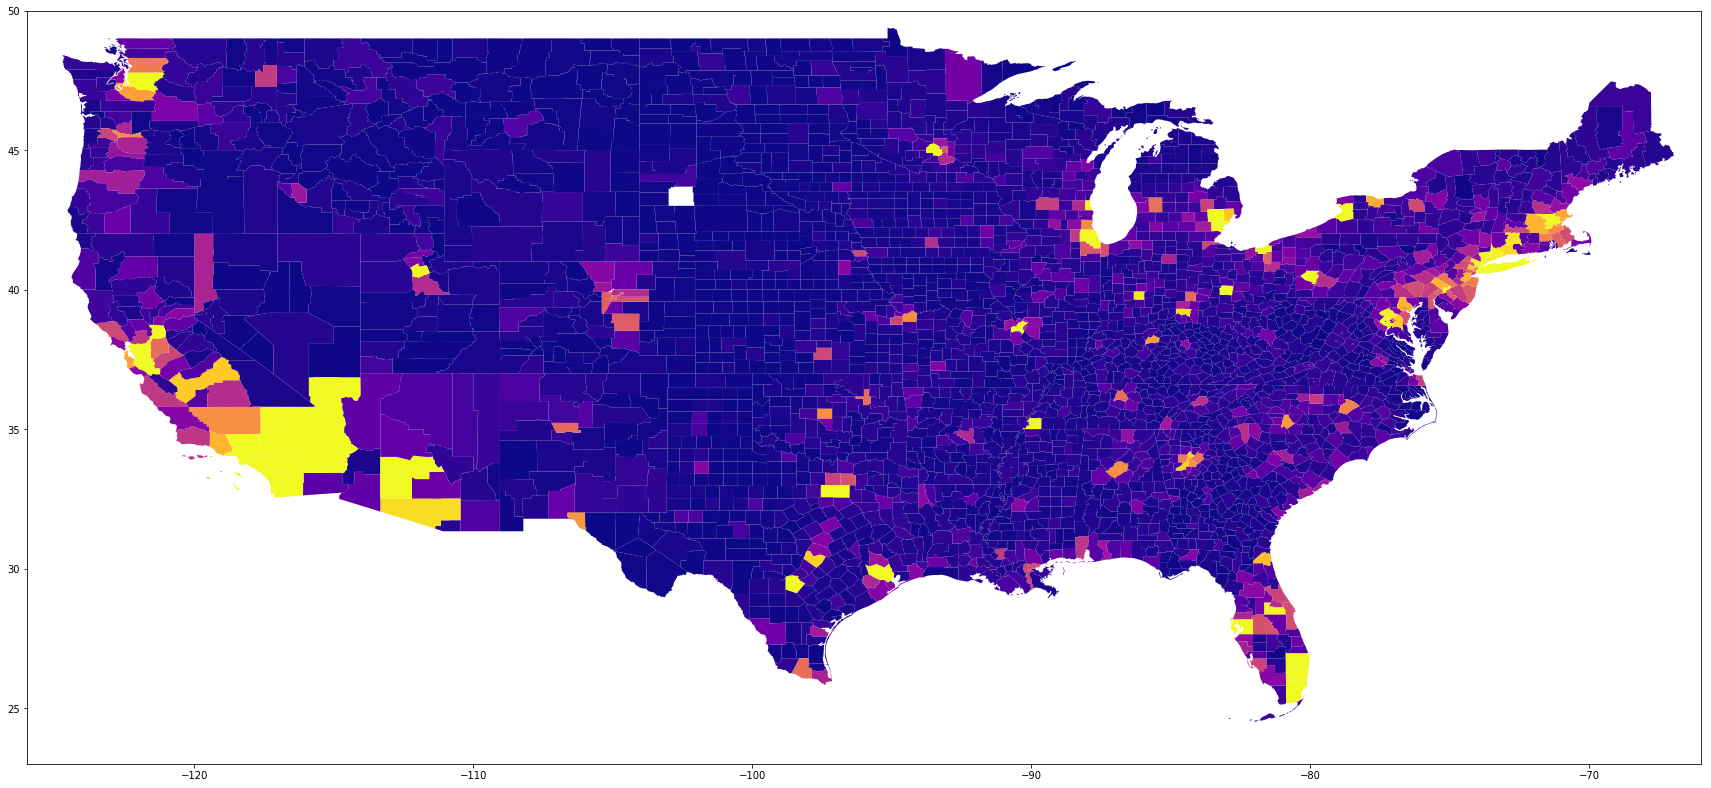

In [6]:
fig, ax = plt.subplots(figsize = (30,30))

ax.set_xlim([-126,-66])
ax.set_ylim([23,50])
geocensus2000sf1.plot(column = 'Number; Total population', ax=ax, cmap='plasma', 
                      vmin = 100, vmax = 900000)

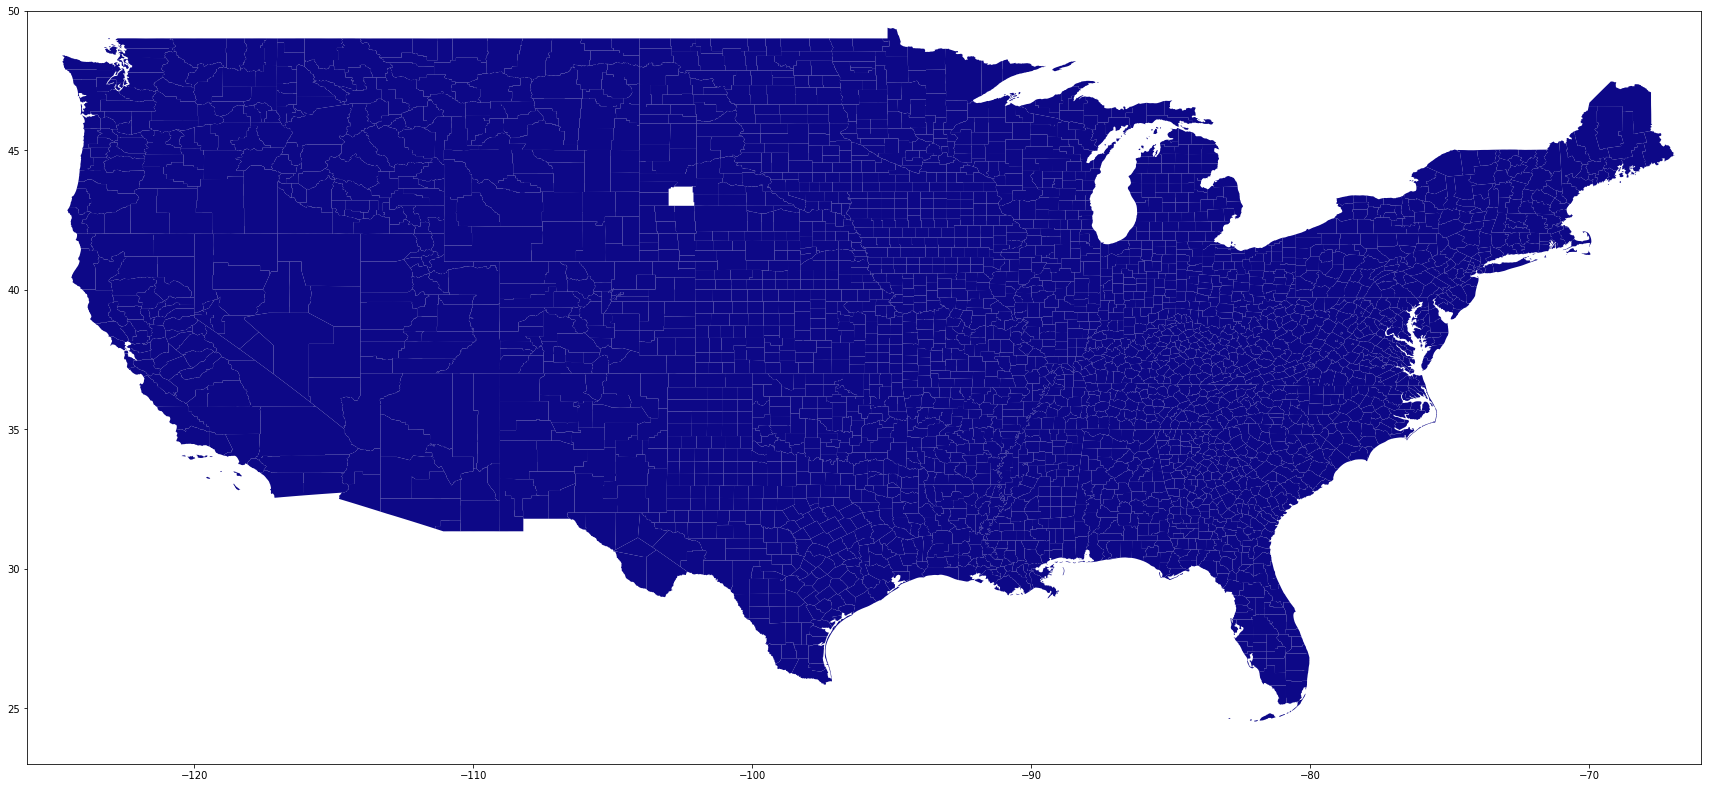

In [7]:
fig, ax = plt.subplots(figsize = (30,30))

ax.set_xlim([-126,-66])
ax.set_ylim([23,50])
geocensus2010sf1.plot(column = 'Number; SEX AND AGE - Total population', ax=ax, cmap='plasma', 
                      vmin = 100, vmax = 900000)

<p>The first problem I discovered is there is a missing county in my data. it shows up as the white spot.</p>
<p>I created the view counties by state function to discover what state had the missing county, and correct for it.  I won't go through all of the states to show you which one it was. South Dakota turned out to be the culprit, and I looked at a map of that state to determine what the county was.</p>
<p>Shannon County changed it's name to Oglala Lakota County in 2017, and with the name change their GeoID tag changed. I discovered the GeoID tags of both Shannon, and Oglala Lakota, and in the shapefile, I change the tag for Oglala Lakota back to Shannon County.</p>

In [8]:
data[['AFFGEOID', 'NAME']].loc[data['NAME'].str.startswith('Ogla')].head()

AFFGEOID           NAME
2351  0500000US46102  Oglala Lakota

In [9]:
census10sf1[['Id', 'Geography']].loc[census10sf1['Geography'].str.startswith('Shannon County, South Dakota')]

Id                     Geography
2417  0500000US46113  Shannon County, South Dakota

In [10]:
#created a filter to only keep characters up to the first parentheses and then turn that value into an integer and return it.
#I had never done this before and it worked first time, Beginners Luck
def cutoff(s):
    val = ''
    for i in s:
        if (i == '('):
            break
        else:
            val = val + (i)
    return int(val)

census10sf1['Number; SEX AND AGE - Total population'] = census10sf1['Number; SEX AND AGE - Total population'].apply(cutoff)

data['AFFGEOID'] = data['AFFGEOID'].replace({'0500000US46102' : '0500000US46113'})

geocensus2000sf1 = data.merge(census00sf1, left_on='AFFGEOID', right_on='Id', how = 'inner')
geocensus2010sf1 = data.merge(census10sf1, left_on='AFFGEOID', right_on='Id', how = 'inner')

<p>Now that I have the GeoID's of both, I can change the one in the shapefile to locate as the old County, I won't go through the trouble to change the name, as it is already correct today.</p>

<p>After I finished munging the data from the 2010 Census Data. I had some trouble with the largest counties in the US throwing off the visualization. These Outliers had to be dealt with by setting the min and max values to numbers that allowed me to properly show the population differences.  When I looked at my max and min values over the entire range of populations of each county, I could see that this was only a fools errand, and I would have to change my approach.</p>

<p>This is when I discovered the vmin, and vmax plotting functions and how they set limits on the highest, and lowest values in your data.</p>

<p>While working on this, I decided to set values which would lock the largest counties to the top of my colormap, and allow all the other counties to be displayed with an increased contrast.</p>

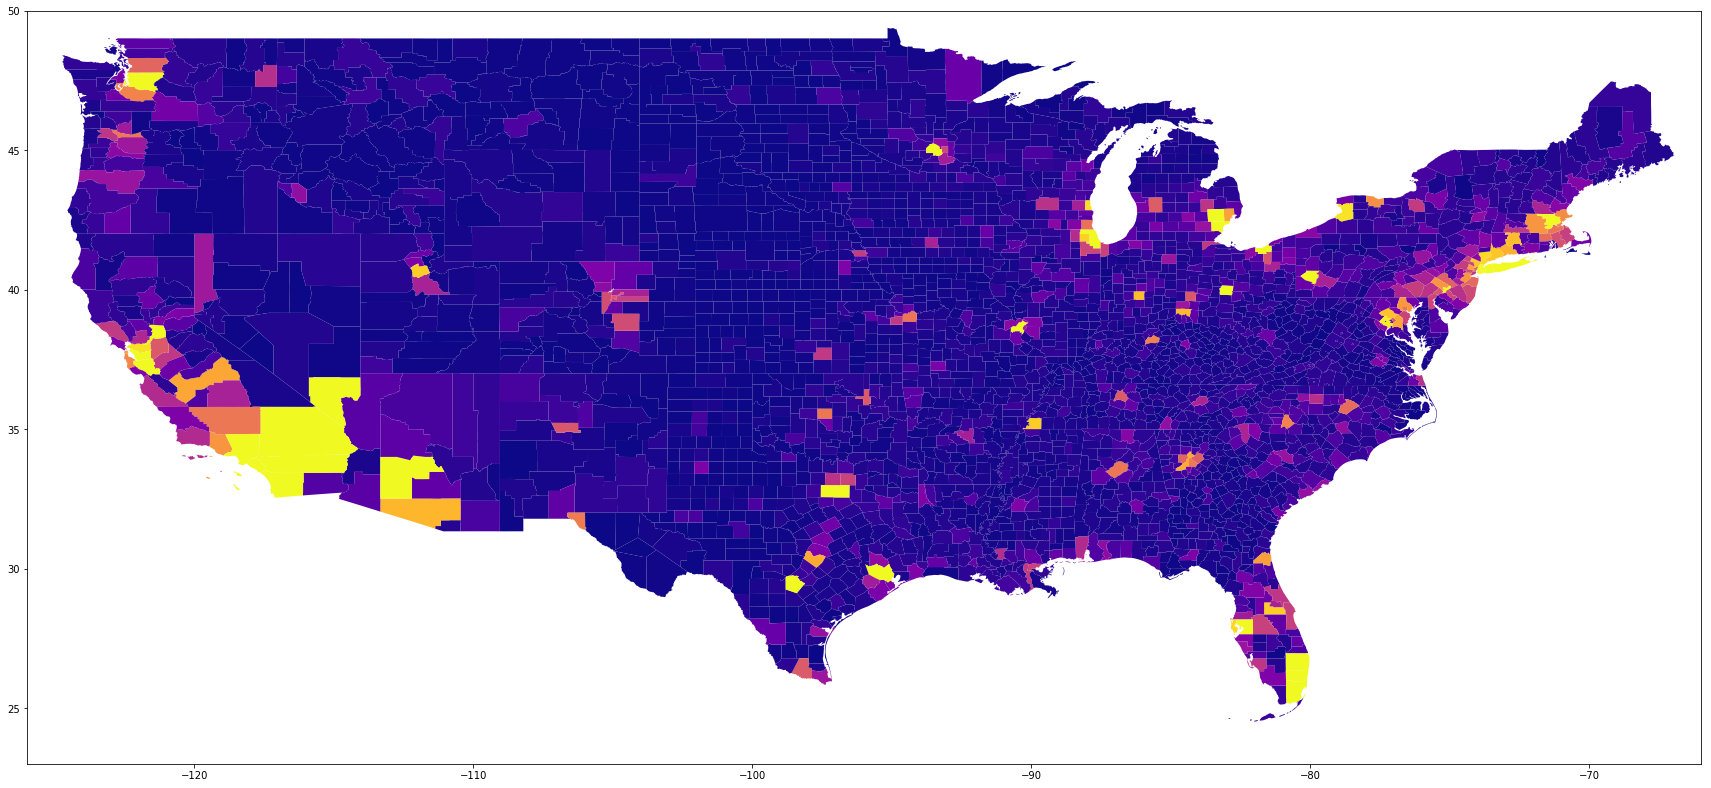

In [11]:
fig, ax = plt.subplots(figsize = (30,30))

ax.set_xlim([-126,-66])
ax.set_ylim([23,50])
geocensus2000sf1.plot(column = 'Number; Total population', ax=ax, 
                      cmap='plasma', vmin = 100, vmax = 1000000);

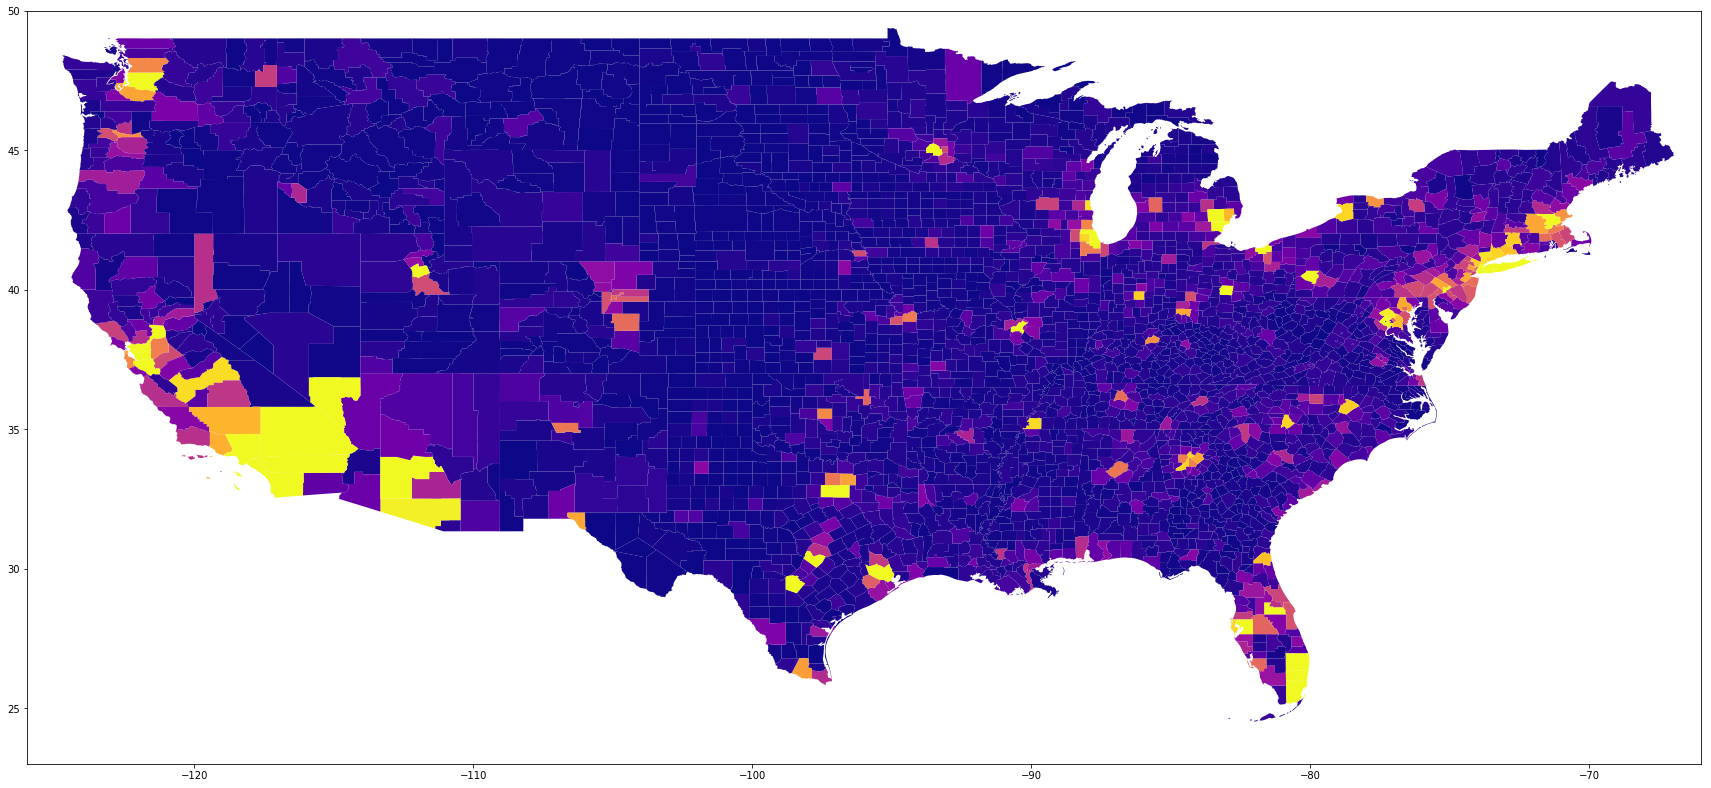

In [12]:
fig, ax = plt.subplots(figsize = (30,30))

ax.set_xlim([-126,-66])
ax.set_ylim([23,50])
geocensus2010sf1.plot(column = 'Number; SEX AND AGE - Total population', ax=ax, 
                      cmap='plasma', vmin = 100, vmax = 1000000)

<p>The range was so wide across the US, that I looked at each state, and ranged the min and max according to the individual state. These graphs properly showed the population range in each state. The Max was set to 1,000,000 and the min was set to 100</p>

<p>In order to speed things up a bit, I decided to combine my datasets into a single dataset. </p>
<p>I am also post processing the data, as to pull out and create a column for each state, to assist with mapping individual states.</p>

In [13]:
# Creating DataFrames to hold the data to put in the final merged dataframe
censuscombined = pd.DataFrame()
census10broken = pd.DataFrame()

# Pulling only the information I need out of the dataframes, and combining them with merged.
censuscombined[['Geo ID', 
                'Population00', 
                'Geography']] = census00sf1[['Id', 'Number; Total population', 'Geography']]
census10broken[['Geo ID', 
                'Population10']] = census10sf1[['Id','Number; SEX AND AGE - Total population']]
merged = censuscombined.merge(census10broken, on='Geo ID', how='inner')

# Merging the dataframe with the geodatagrame to create the dataframe with only what 
# I am using inorder to improve performance.
merged = data.merge(merged, right_on = 'Geo ID', left_on = 'AFFGEOID', how = 'inner')
merged['State'] = [x[1] for x in merged['Geography'].str.split(', ')]

<p>One of the biggest problems I had with this was making a generic function. I finally settled on the one above. This function takes an individual state name, and plots the data for it with the name printed in each county. And with the scale of the colormapping specifically set for that state, with the largst county set to the max value in the colorbar, and the smallest county set to the min value in the colorbar.</p>
<p>Below I will plot California using the above function</p>

/home/jmurphy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


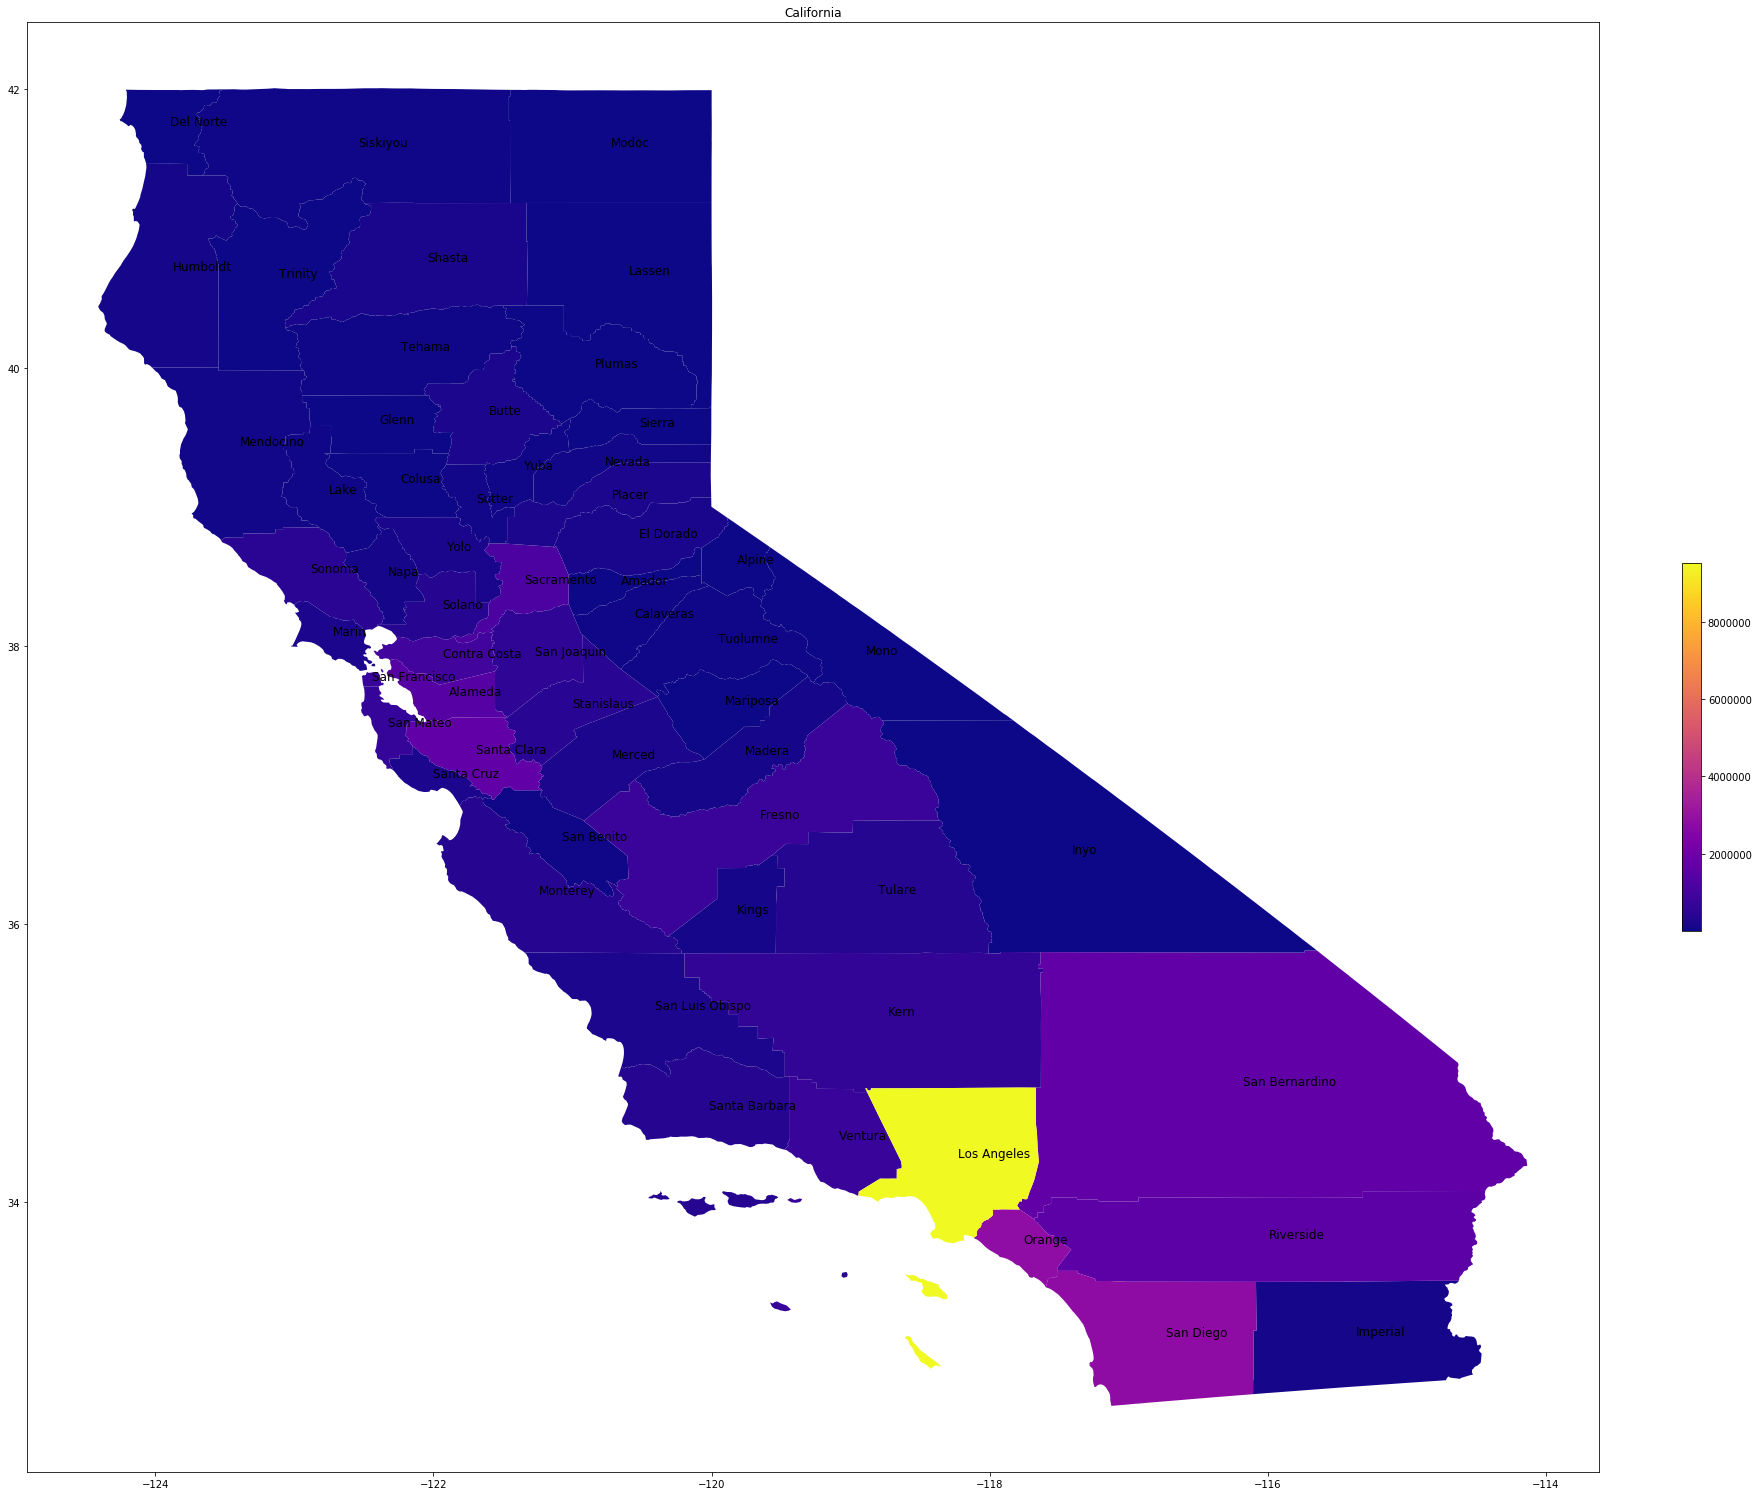

In [14]:
stateplotnames(merged,'California')

<p>Now that the How I did this is out of the way.</p>

<p>Now I needed to get the difference of the populations to show the growth of the population. </p>

In [15]:
# Creating a population Difference column to show population growth.
merged['diff'] = -(merged['Population00'] - merged['Population10'])

<p>Now that everything is in order, I will plot the population difference over the entire Country.</p>
<p>To make things easier for us, we need to create another column to tell us what state each county is in.</p>

In [16]:
# Here I am creating a state function by splitting the Geography column, 
# and only returning the state portion.
merged['State'] = [x[1] for x in merged['Geography'].str.split(', ')]

<p>Now that we have all of that out of the way, we can begin to plot each state simply and easily.</p>

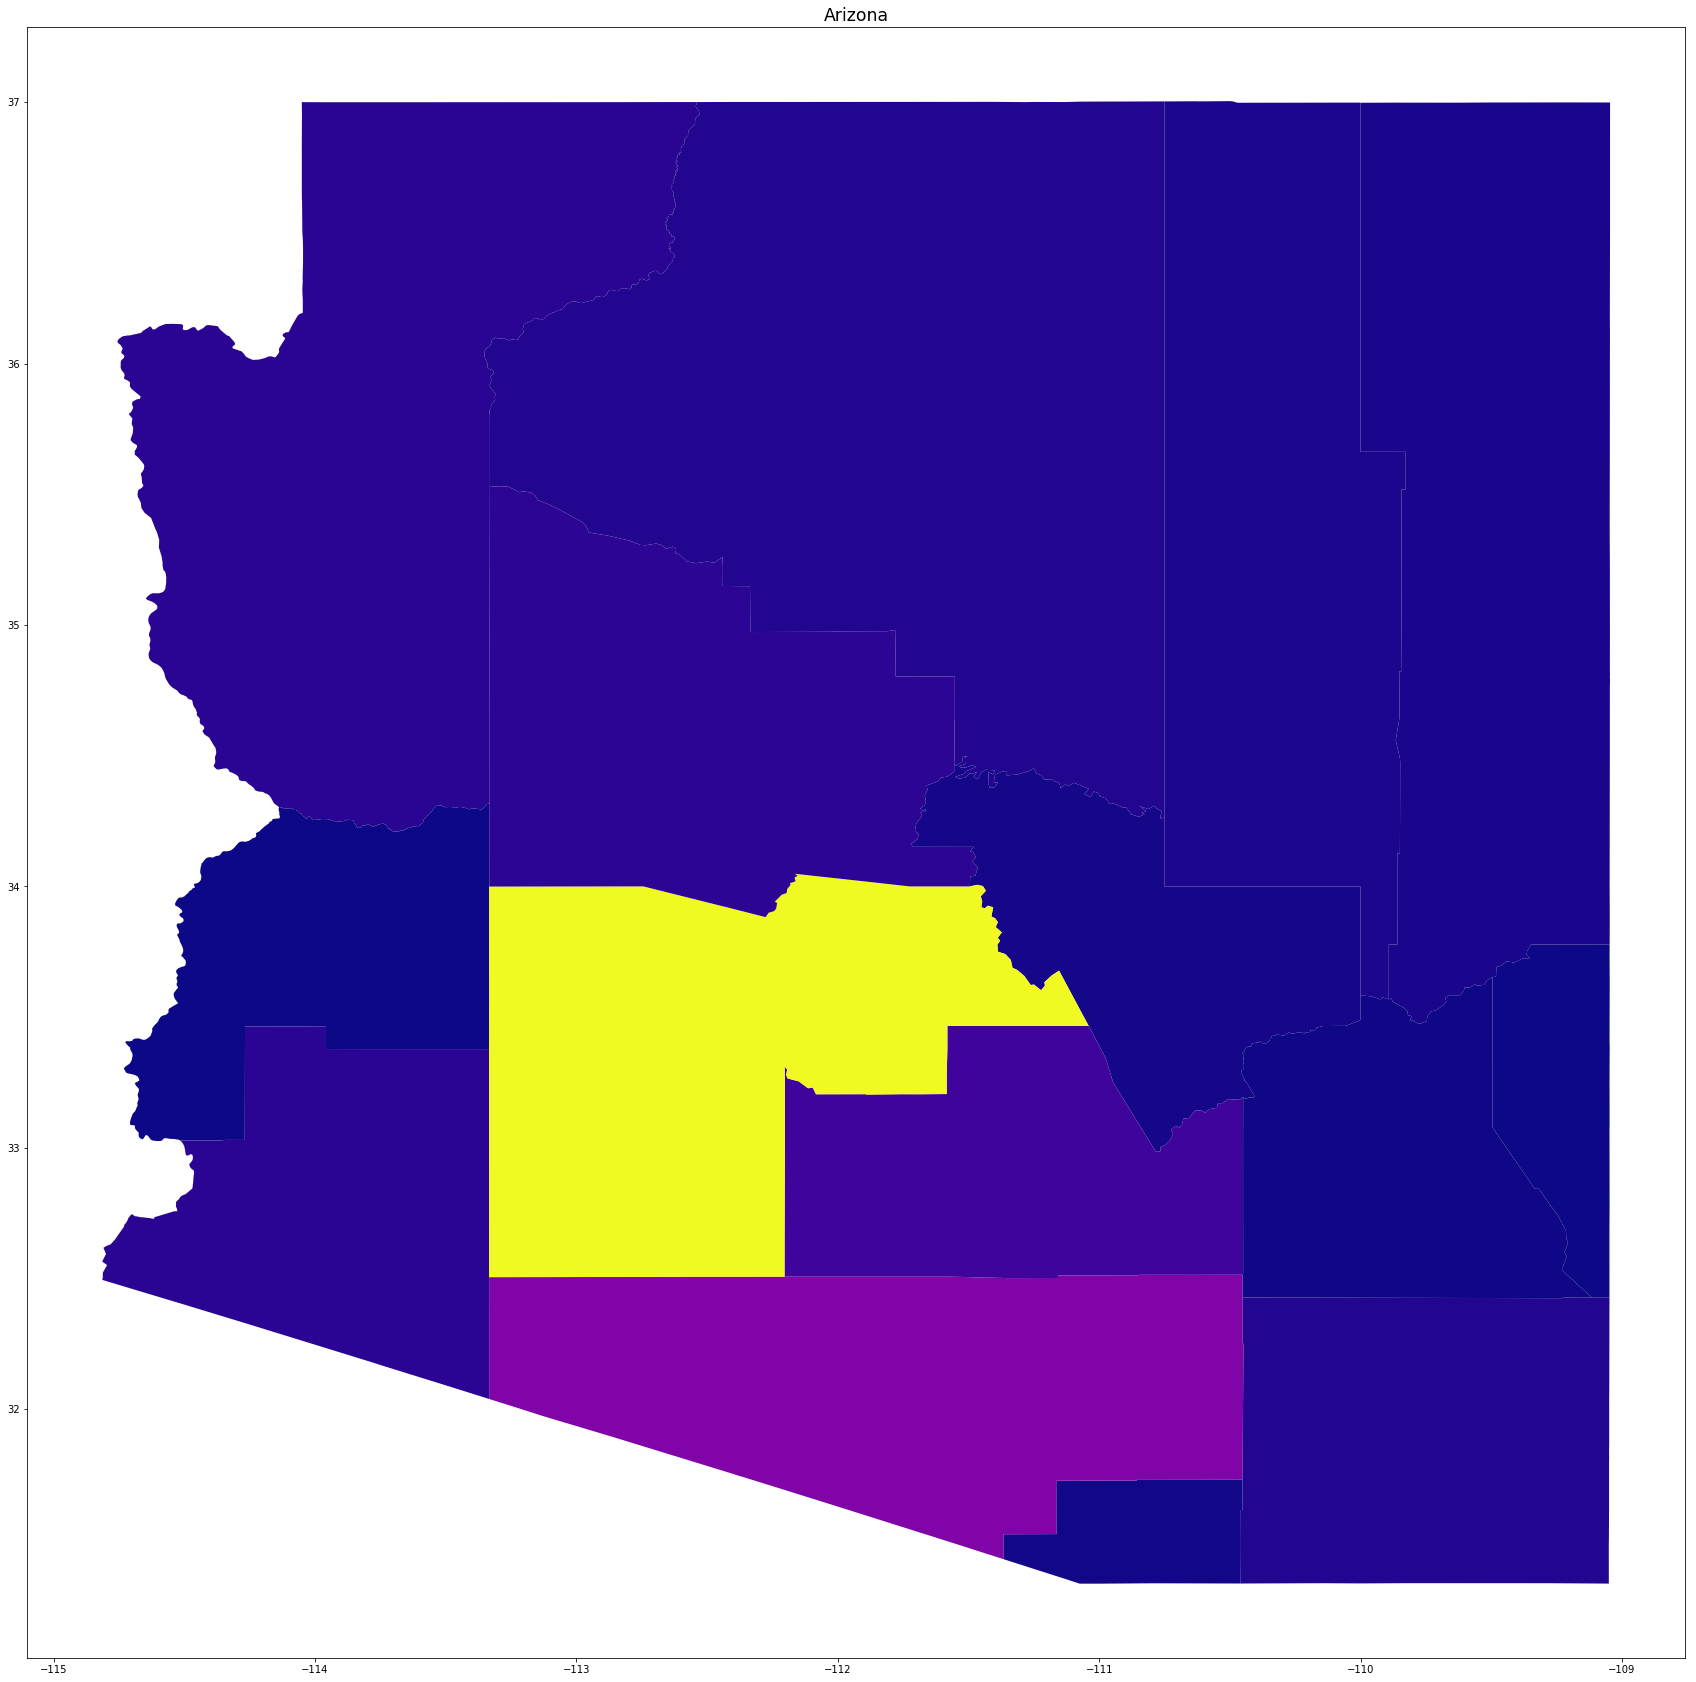

In [17]:
# Declare variable with the state name in it
st = 'Arizona'
smin = 0
smax = 0
colna = 'Population10'
smap = 'plasma'

# Create the Axis and label it.
fig, ax = plt.subplots(figsize = (30,30))
ax.set_title(st, fontsize = 'xx-large')

# Create  a new dataframe that contains only the state being looked at.
ndf = merged.loc[merged['State'].str.strip() == st]
    
if (smin == 0) and (smax == 0):
    smin = ndf[colna].loc[ndf[colna] == ndf[colna].min()]
    smax = ndf[colna].loc[ndf[colna] == ndf[colna].max()]

ndf.plot(column = colna, figsize=(30,30), ax=ax, cmap=smap, vmin = smin, vmax = smax)

<p>Now that I had my difference in population, I could finally look at what countieshave grown the most</p>

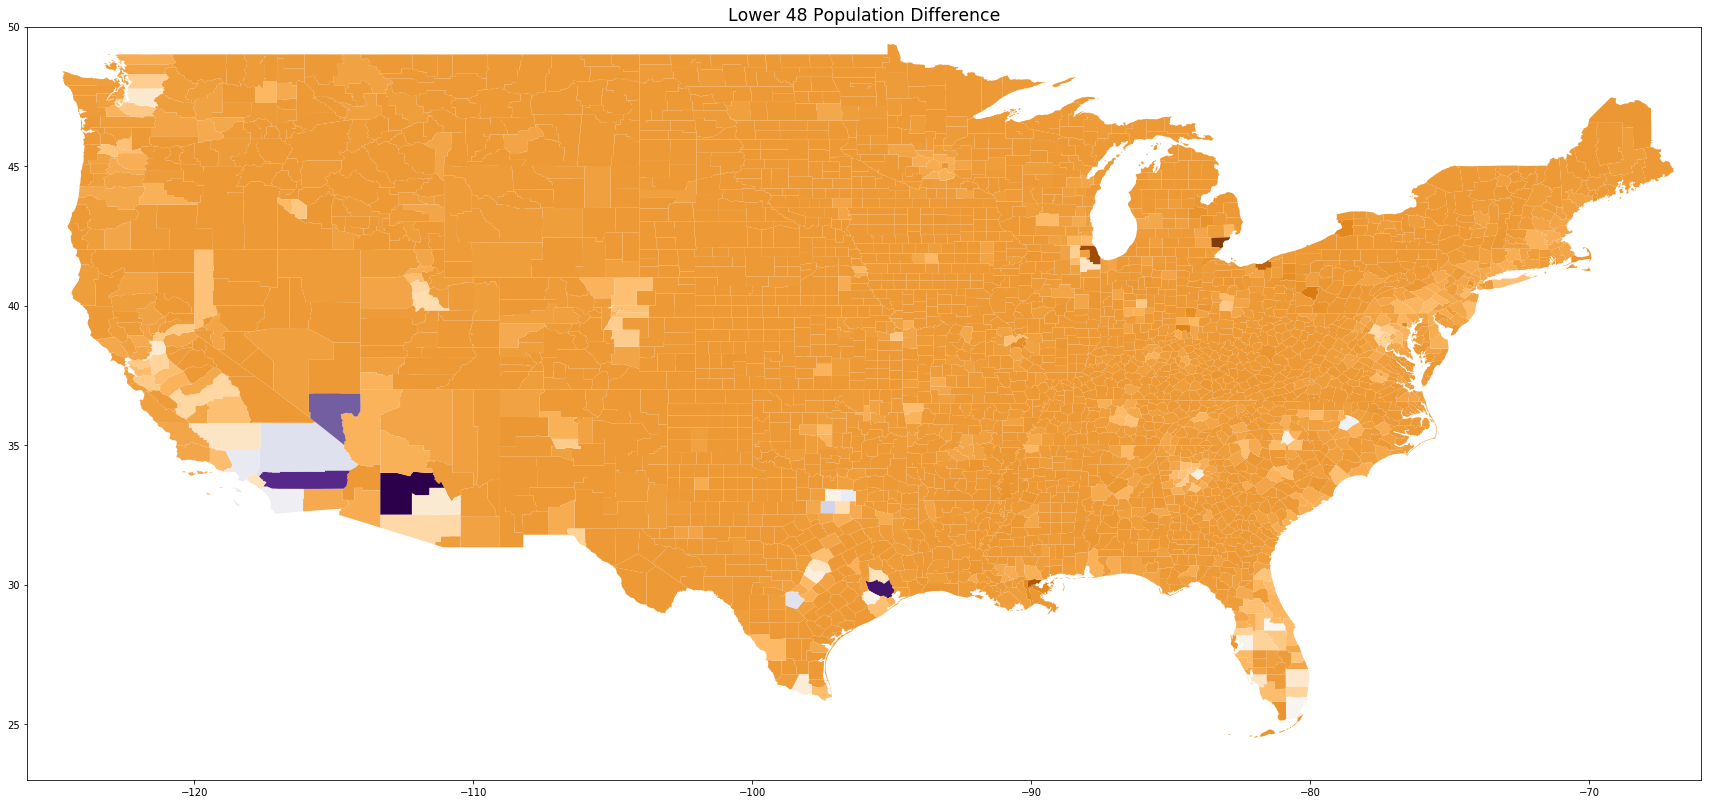

In [18]:
fig, ax = plt.subplots(figsize = (30,30))
ax.set_title('Lower 48 Population Difference', fontsize = 'xx-large')
ax.set_xlim([-126,-66])
ax.set_ylim([23,50])
merged.plot(column = 'diff', ax=ax, cmap='PuOr')

<p>At first glance I note a problem, I expect a lot of the country to be showing up as a much lighter shade than this. This had me thinking for a while, and then I realized that I hadn't normalized it accross the population.</p>
<p>I also had to look at which would be greater the population gain of some counties, or the population loss of some countries. I went with the former, as a population we are growing. </p>
<p>In order to normalize this, I would have to set the max to the max, and the negative max, to the negative min. This was easily done. Also I am going to add a colorbar to give us an idea of what is what.</p>

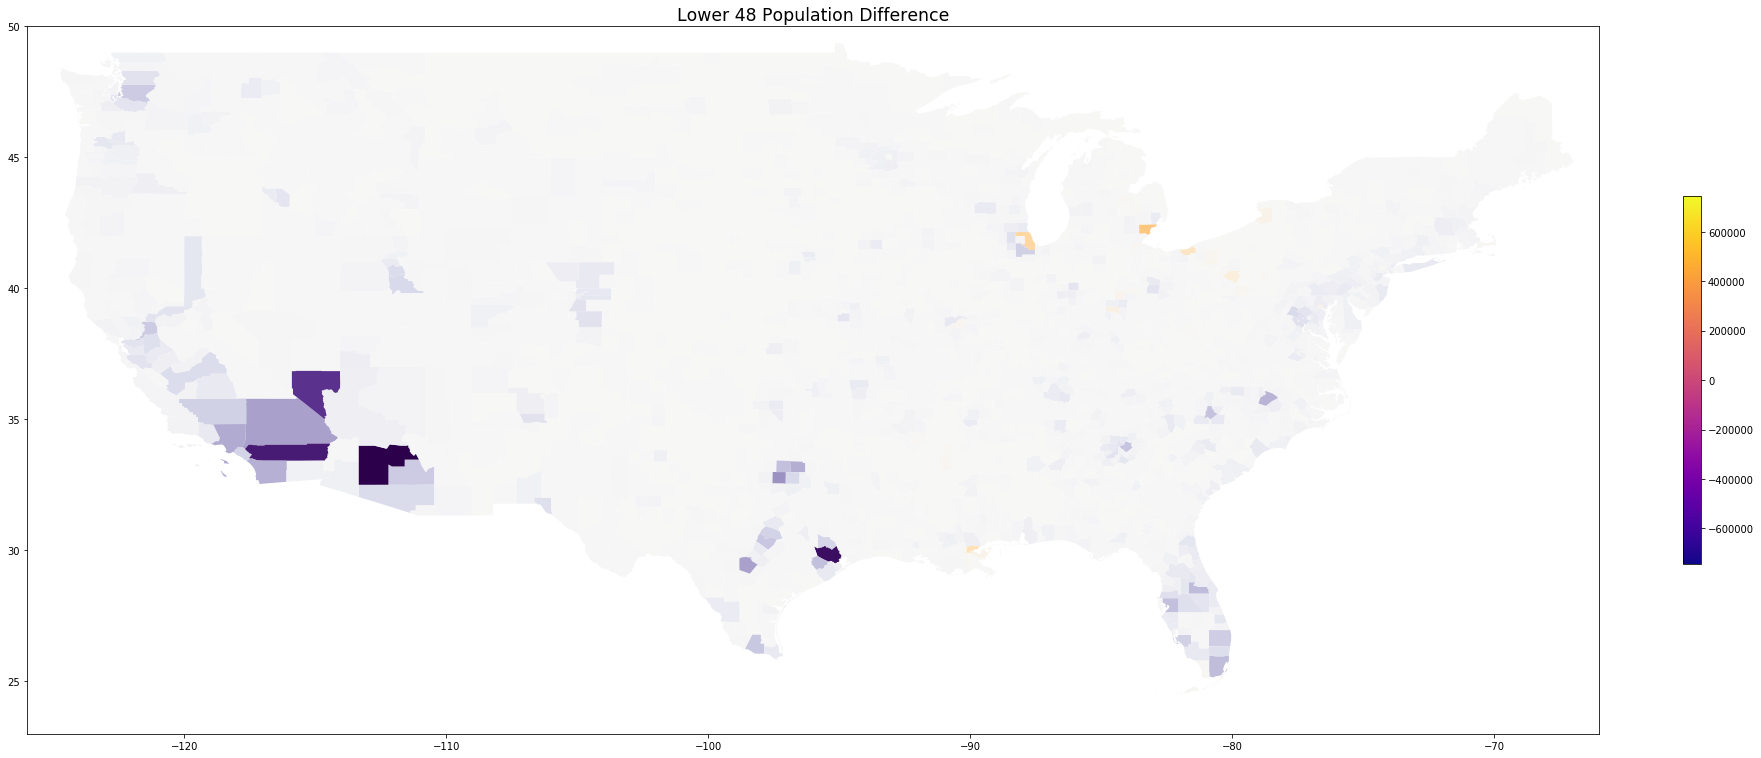

In [19]:
fig, ax = plt.subplots(figsize = (30,30))
ax.set_title('Lower 48 Population Difference', fontsize = 'xx-large')
ax.set_xlim([-126,-66])
ax.set_ylim([23,50])

#setting the min and max values for the color difference
smin = -(merged['diff'].loc[merged['diff'] == merged['diff'].max()])
smax = merged['diff'].loc[merged['diff'] == merged['diff'].max()]

#color bar is created below

sm = plt.cm.ScalarMappable(cmap=smap, norm=plt.Normalize(vmin=smin, vmax=smax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = fig.colorbar(sm, fraction=.011)

# I am using a diverging colormap in order to have zero population growth be white, 
# and any positive population growth be
# Purple, and negative population growth be Orange.
merged.plot(column = 'diff', ax=ax, cmap='PuOr', vmin = smin, vmax = smax)

<p>Now that we have our differences in growth we can pull out the largest growth, and the least growth (possibly negative growth) which it looks like we have here.</p>

In [20]:
merged.set_index('diff').sort_index(ascending = False).head(3)['Geography']

diff
744968        Maricopa County, Arizona
691881            Harris County, Texas
644254    Riverside County, California
Name: Geography, dtype: object

In [21]:
merged.set_index('diff').sort_index(ascending = True).head(3)['Geography']

diff
-240578       Wayne County, Michigan
-182066        Cook County, Illinois
-140845    Orleans Parish, Louisiana
Name: Geography, dtype: object

<p>Before I do the plots of the states containing the largest population  growth, and loss as it turns out, I haven't had any names of the  counties on the plots. I have looked at doing it on a lower 48 states scale, and the counties  are too close together to view the names, so I will do it only  for the single state plotting. </p>

<p>Names, each graph had no names on it, I didn’t know what I was  looking at, unless I recognized the state, and then I had no idea what  the individual counties were. I titled each graph with the name of the  state. I still wasn’t happy though, I needed to put a name to each  county to clarify the data. </p>

<p>This turned out to be the  most difficult process for me, and I thought I had broken the code a few  times. I got to the point where I didn’t know how I was going to finish  and make the most of what I had. I had the county names to go with the  populations, and the differences in populations. I needed a way to place  these names on my graph to clarify what was what.  </p>

<p>I found  tutorial after tutorial after tutorial, non of them worked, I didn’t  want to do something with out complete clarity. I came close to  scrapping my work, and picking different data. I was working with the  example of the fourth or fifth tutorial, when I saw a glimmer of hope. I  saw a graph with all the counties mapped onto the entire United  States. I was so happy, and thought my struggle was over, turns out I  had a long way to go.</p>

<p>The problem with the code was it took  forever to run. I left it for over an hour and nothing finished, I went  back to my thoughts of scrapping it and doing something easier. It was  late, I was getting tired, I wanted to give up.</p>

<p>I kept at it. I  decided to break it down into the pieces that made sense to me. Then I  found the problem, the tutorial I was using had a few data points, and  used a text processing library to enhance the text further. I commented  it out, and crisis averted. Now I faced another issue. The counties  weren’t large enough to fit the text in them displaying the entire USA, I  tried resizing the font, resizing the figure size, there were still too  many to display in the given space. The only thing I had accomplished  doing was muddling up the graph of the Lower 48 states.</p>

<p>I wasn’t  dishearted though, There wasn’t enough room on the graph to  display the county names on the entire map.  I changed some  things around and added more functions, These new functions took  labeling to the individual state levels, and things looked Beautiful.</p>

<p>I will go through the process of plotting a state map, and have the names on it.</p>
<p>** Also note the functions are designed to work with the merged dataframe**</p>

/home/jmurphy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


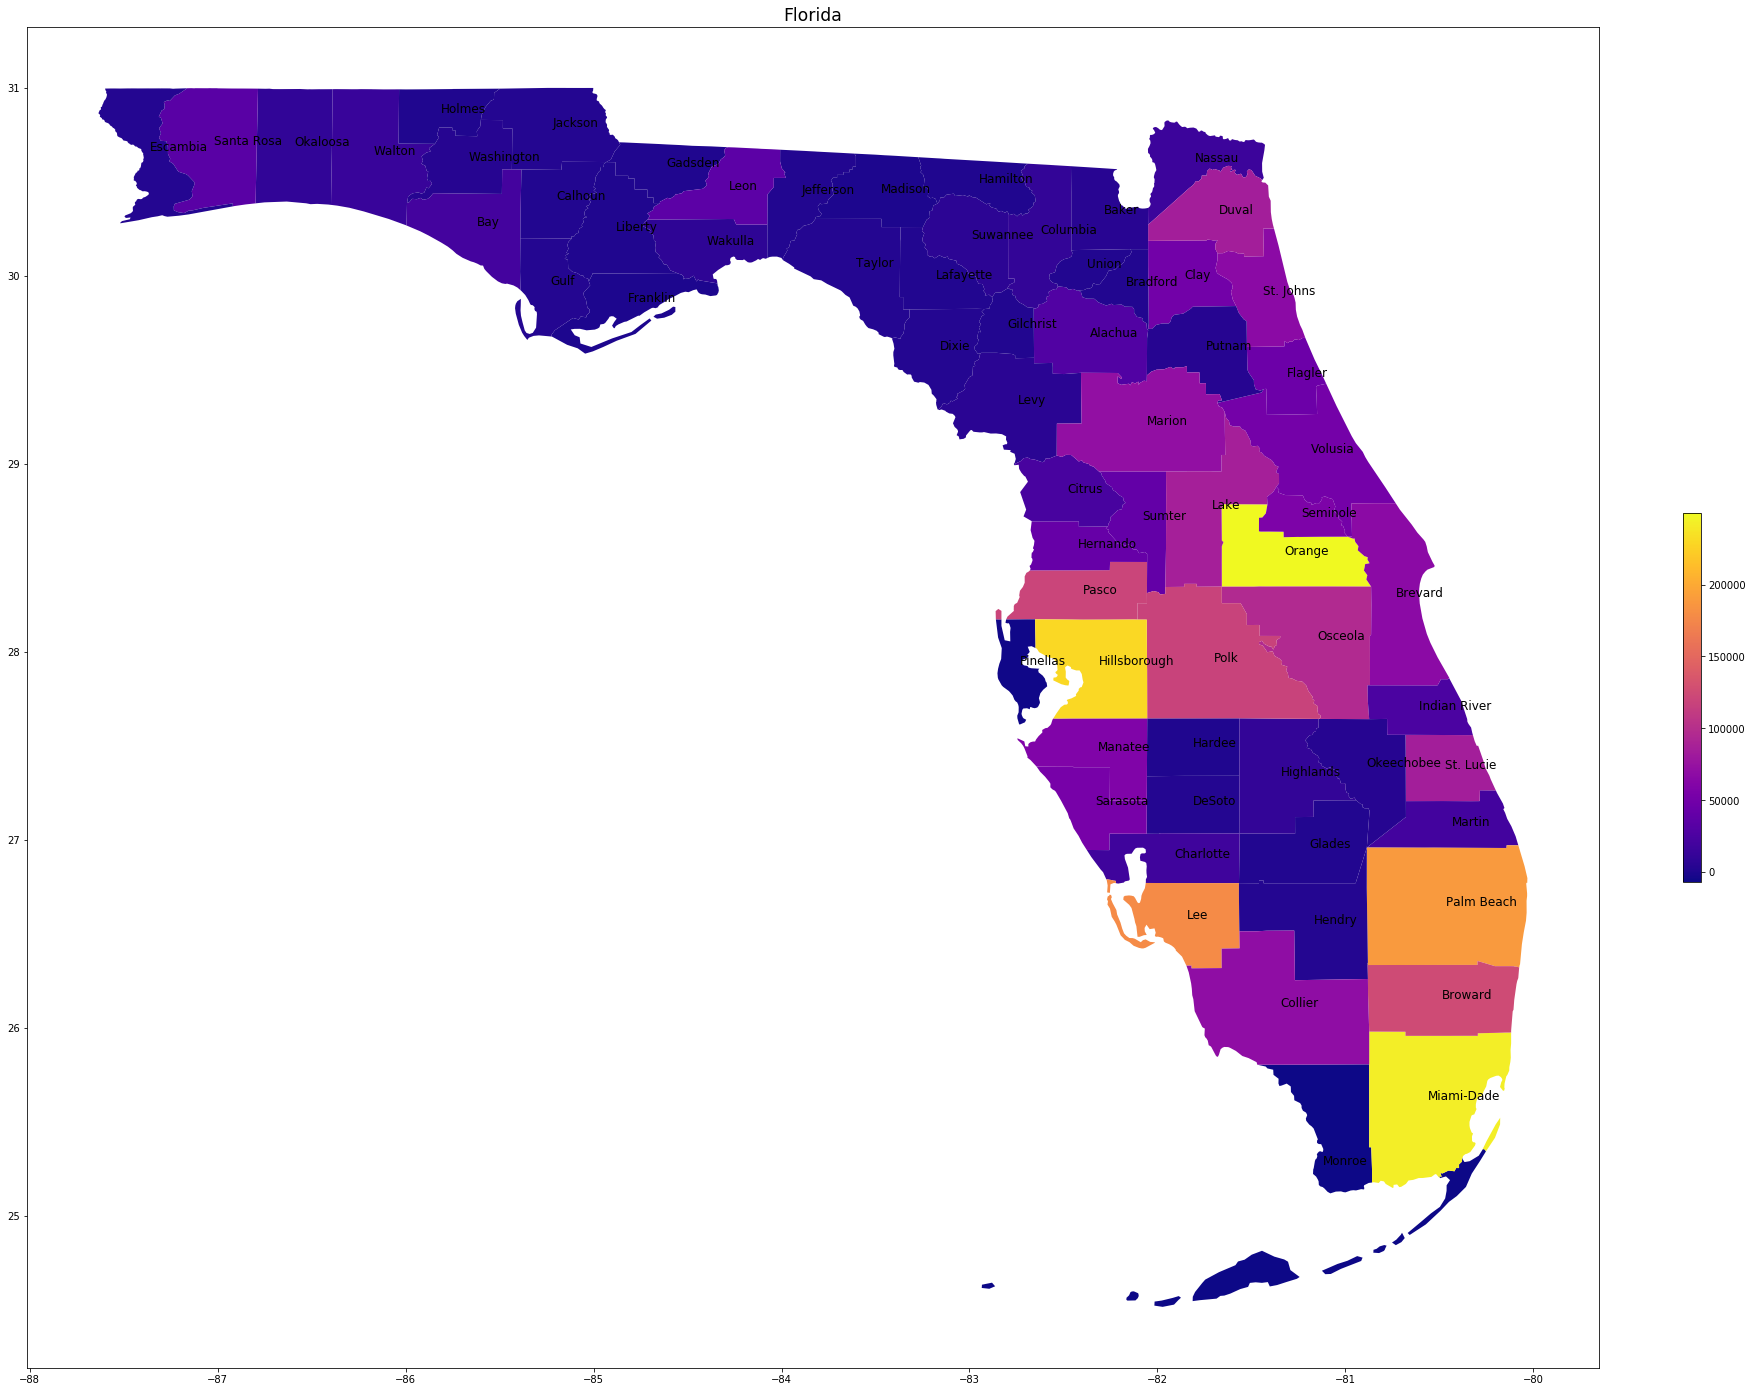

In [22]:
# I am doing this in a modular fashion as to improve transition to a function later.
df = merged
st = 'Florida'
colna = 'diff'
smin = 0
smax = 0
texts = []
fig, ax = plt.subplots(figsize = (30,30))

# Setting the title to the state name
ax.set_title(st, fontsize = 'xx-large')

# Creating a new Dataframe to hold only the state selected
ndf = df.loc[df['State'].str.strip() == st]

# setting points at the center of every county
ndf['center'] = ndf['geometry'].centroid
data_points = ndf.copy()
data_points = data_points.set_geometry('center')

# If smin and smax are both 0 which is the default in the definition
# I want to set the smin and smax to the largest county, 
# and smallest county of the individual state.
if (smin == 0) and (smax == 0):
    smin = ndf[colna].loc[ndf[colna] == ndf[colna].min()]
    smax = ndf[colna].loc[ndf[colna] == ndf[colna].max()]
    
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=smap, norm=plt.Normalize(vmin=smin, vmax=smax))
sm._A = []
cbar = fig.colorbar(sm, fraction=.011)

# Plot the individual state with a colorbar, and each county labeled.
ndf.plot(column = colna, figsize=(30,30), ax=ax, cmap=smap, 
         vmin = smin, vmax = smax)

# Setting the labels to the individual points.
for x, y, label in zip(data_points.geometry.x, 
                       data_points.geometry.y, data_points['NAME']):
    texts.append(plt.text(x, y, label, fontsize = 12))

<p>Now that we have things working, we can look at the states that we found having the population gain or loss.</p>
<p> Below I am plotting the states using the function stateplotnamesdiff. The function it was derived from is noted below, and all functions are declared at the top of this Jupyter Notebook. </p>

/home/jmurphy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


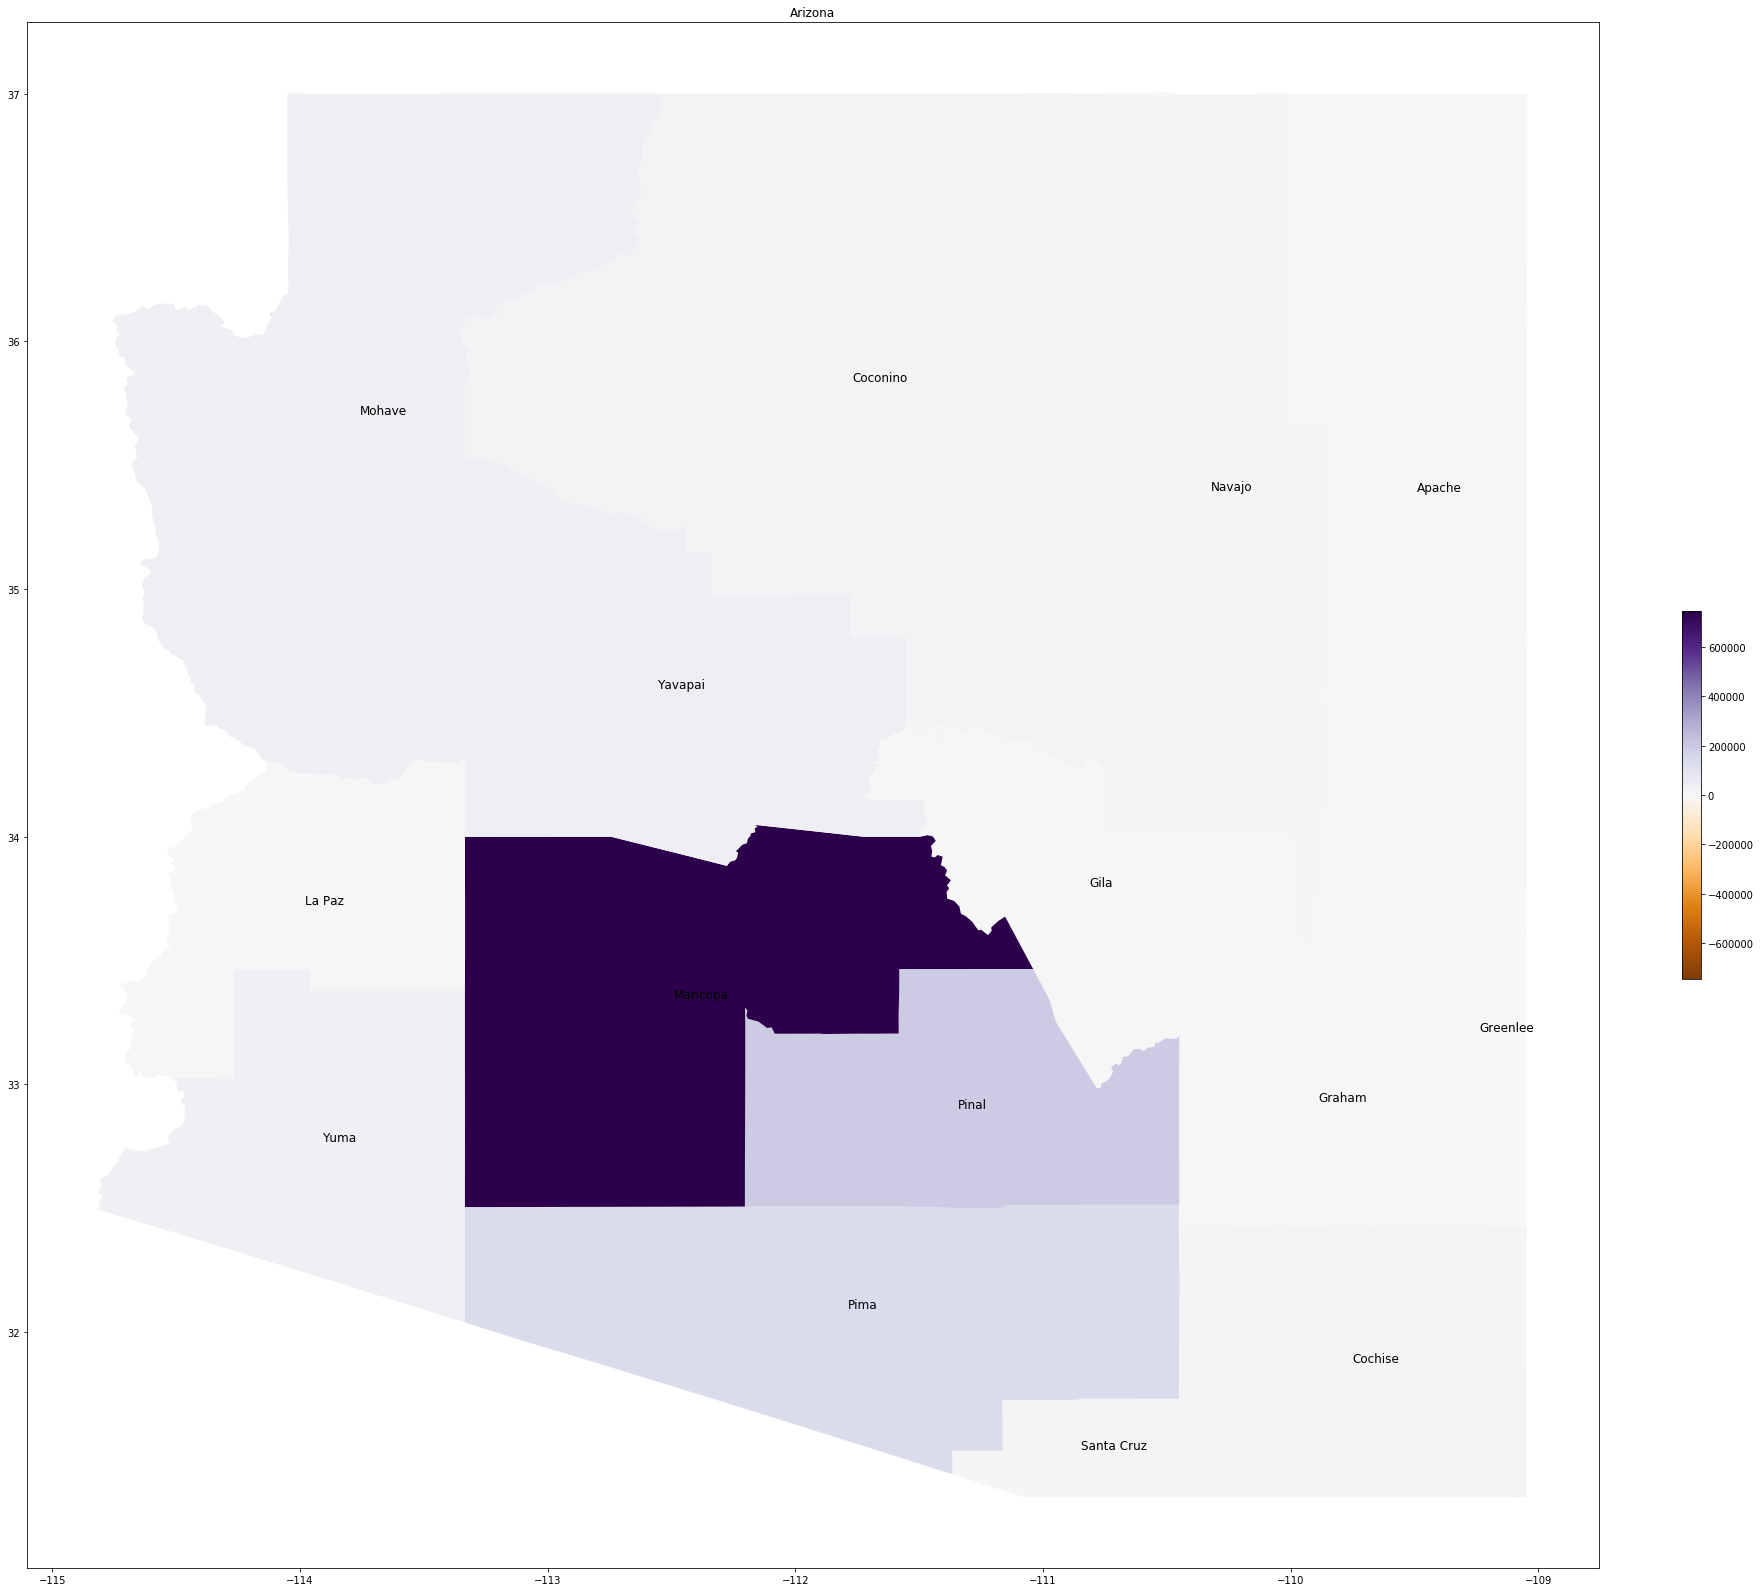

In [23]:
stateplotnamesdiff(merged,'Arizona', colna = 'diff', smap = 'PuOr')

/home/jmurphy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


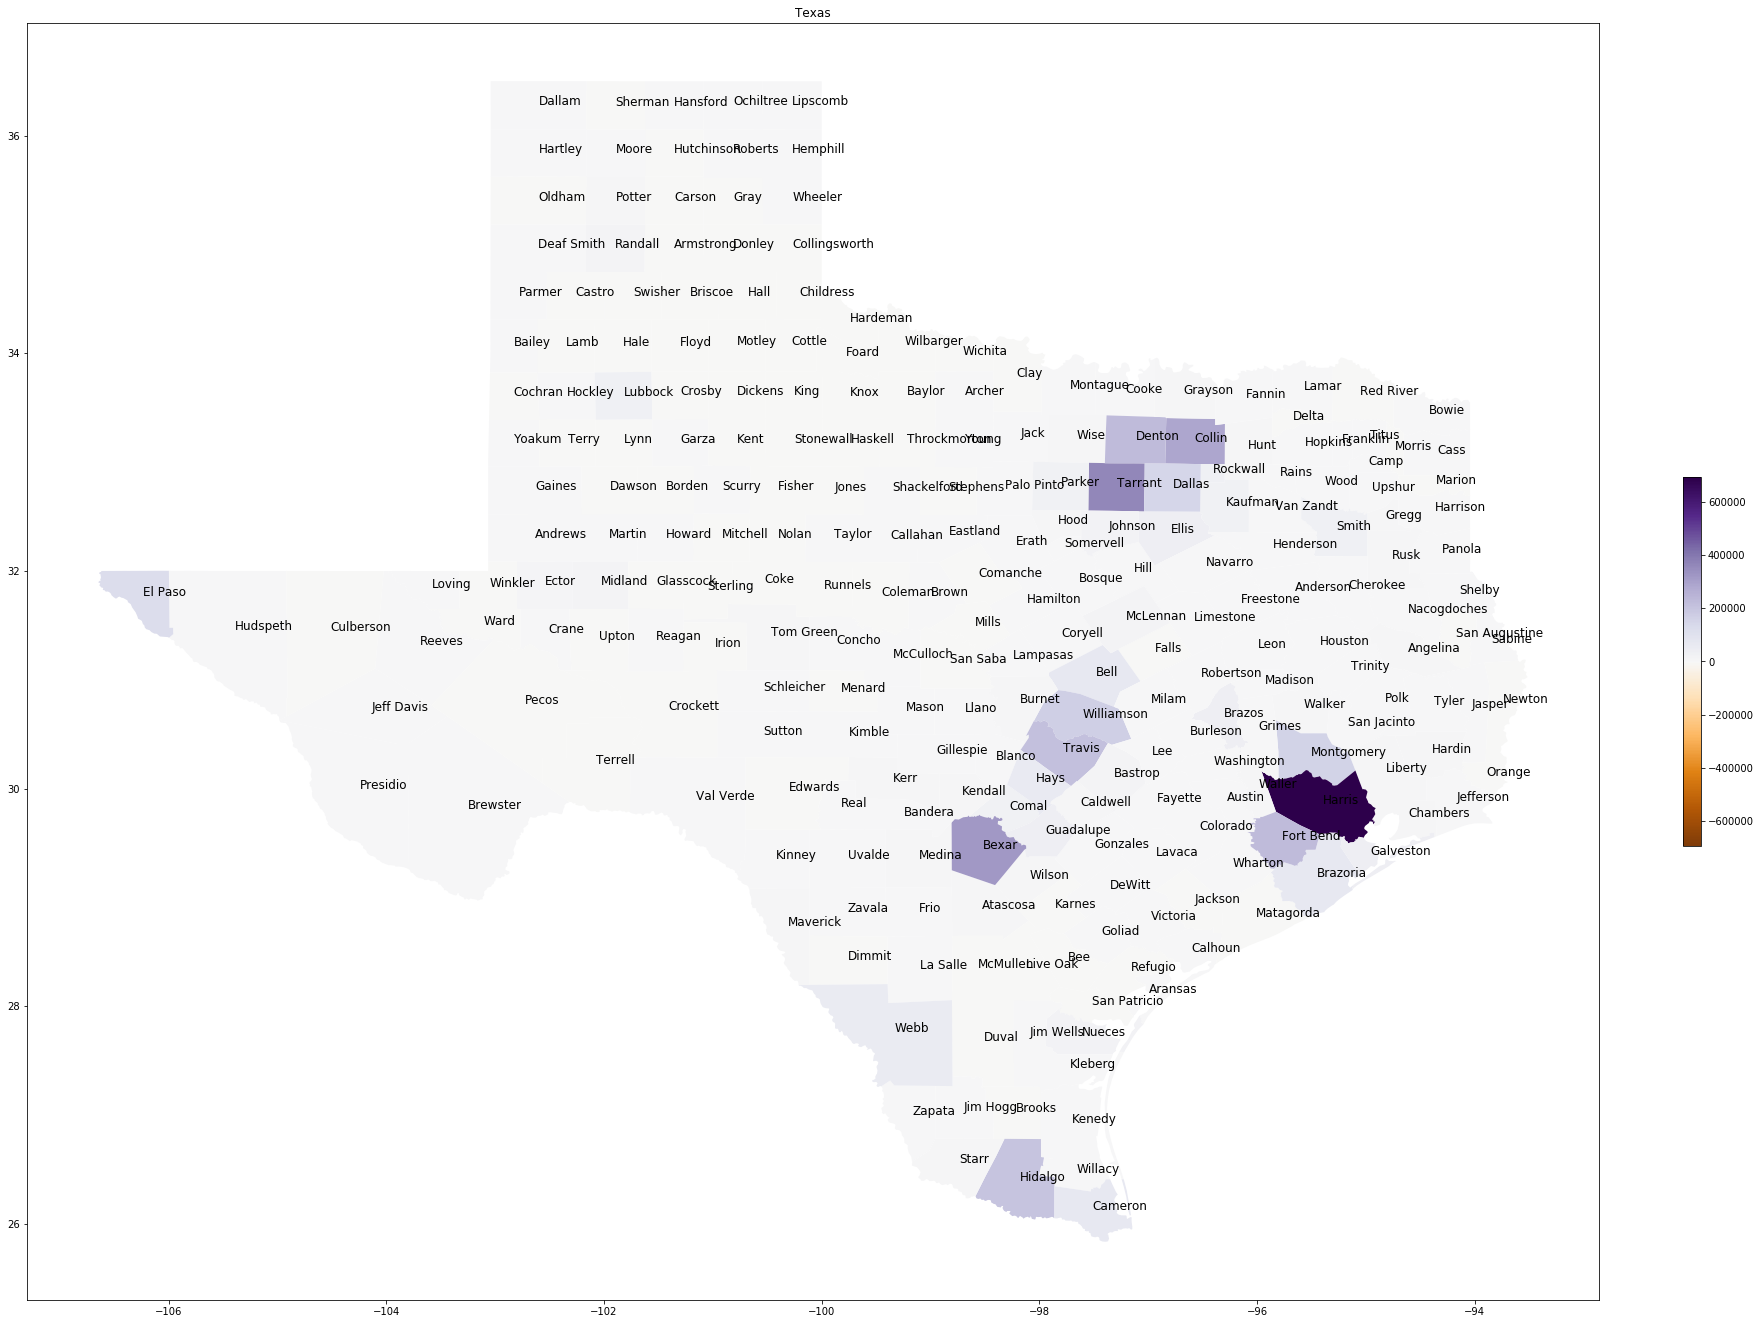

In [24]:
stateplotnamesdiff(merged,'Texas', colna = 'diff', smap = 'PuOr')

/home/jmurphy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


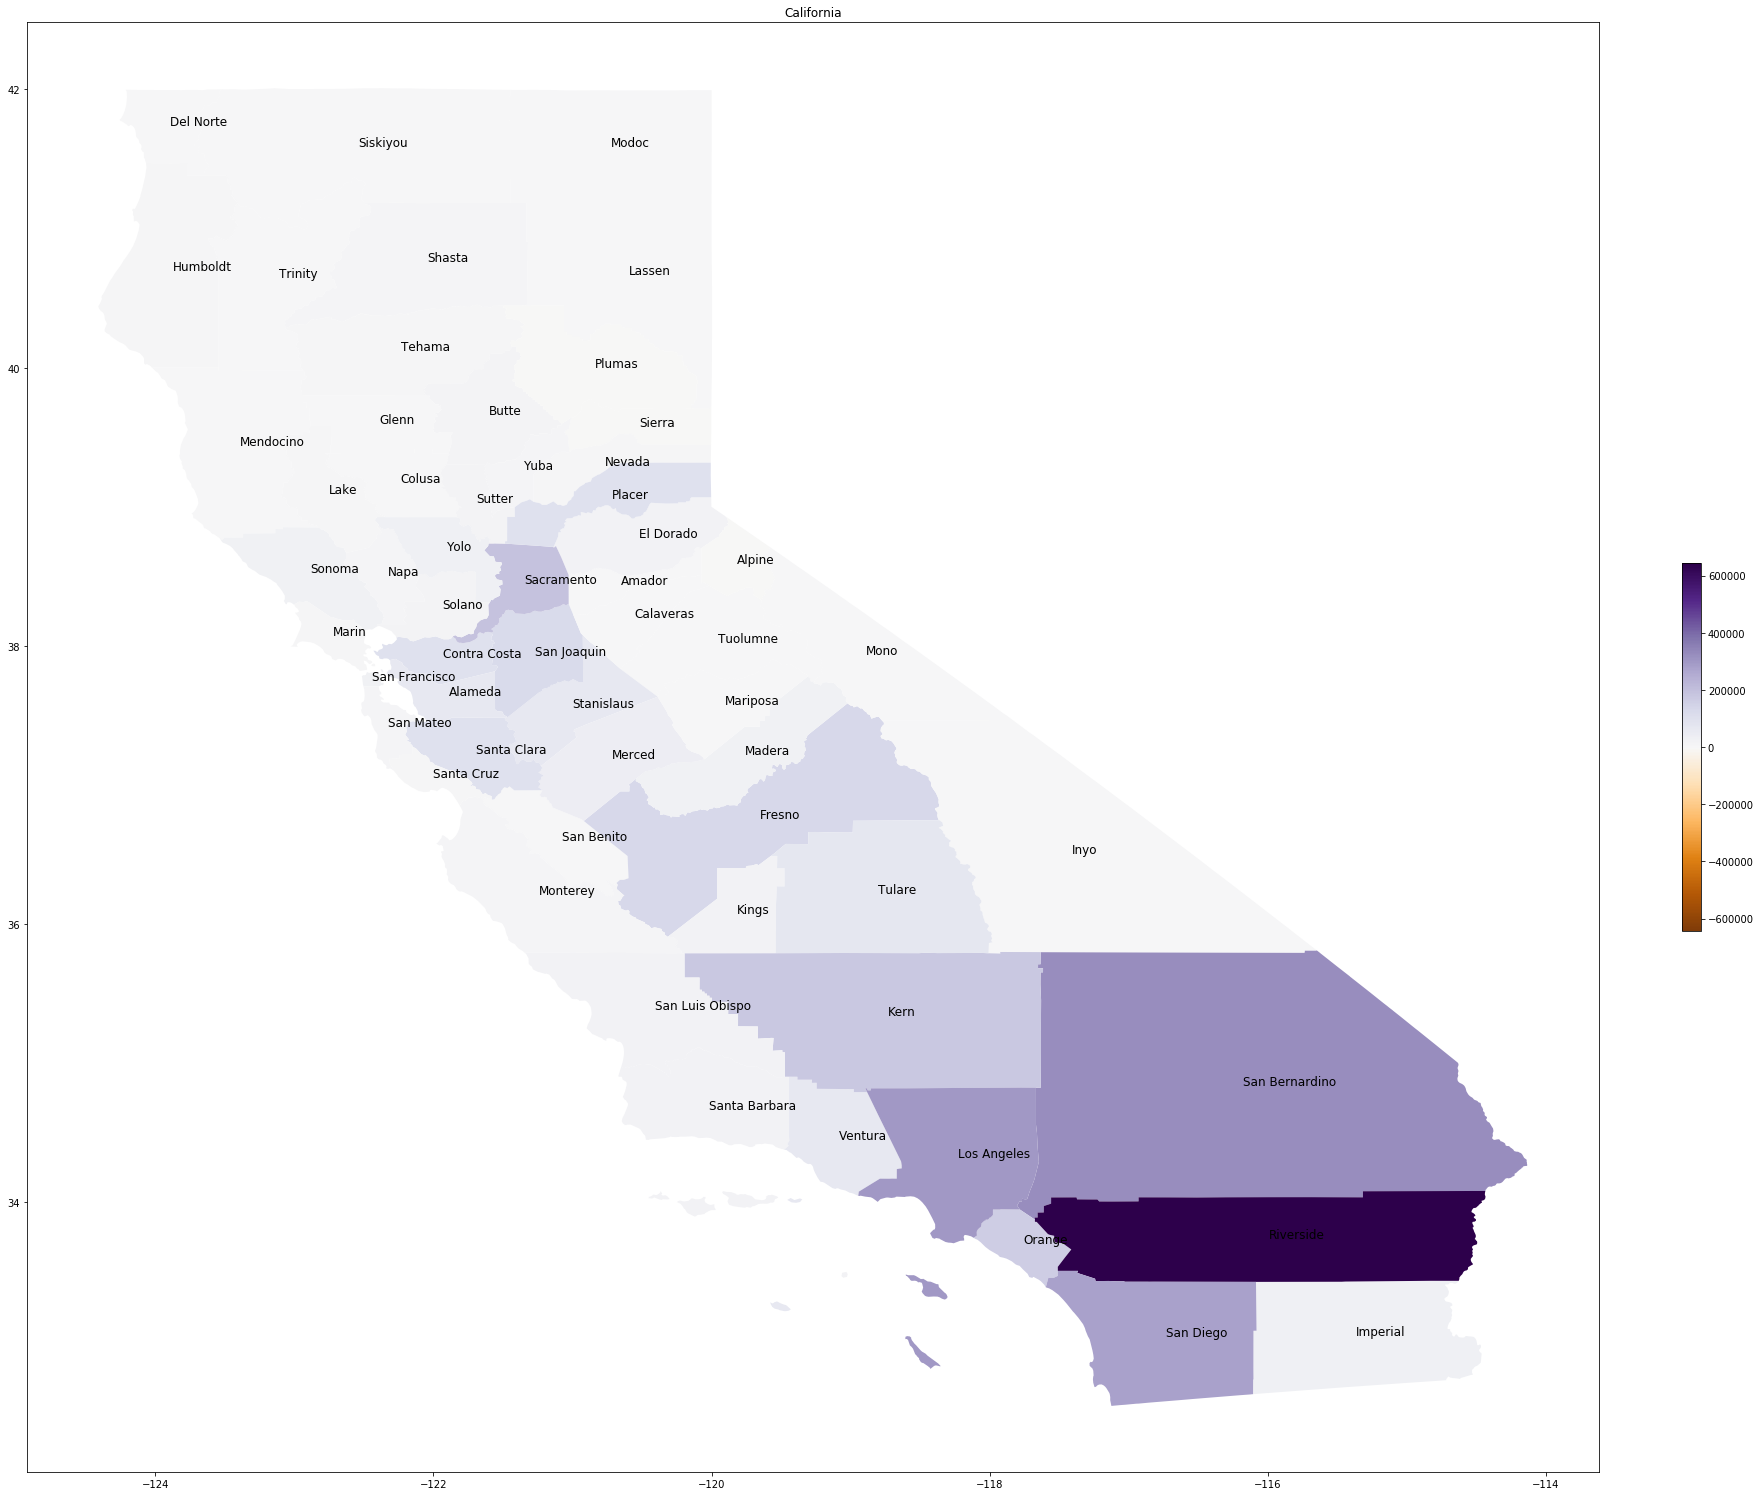

In [25]:
stateplotnamesdiff(merged,'California', colna = 'diff', smap = 'PuOr')

<p>Now we can see the Counties with the largest growth plotted according to their individual state.</p>
<p>The states with the largest losses are shown below.</p>

/home/jmurphy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


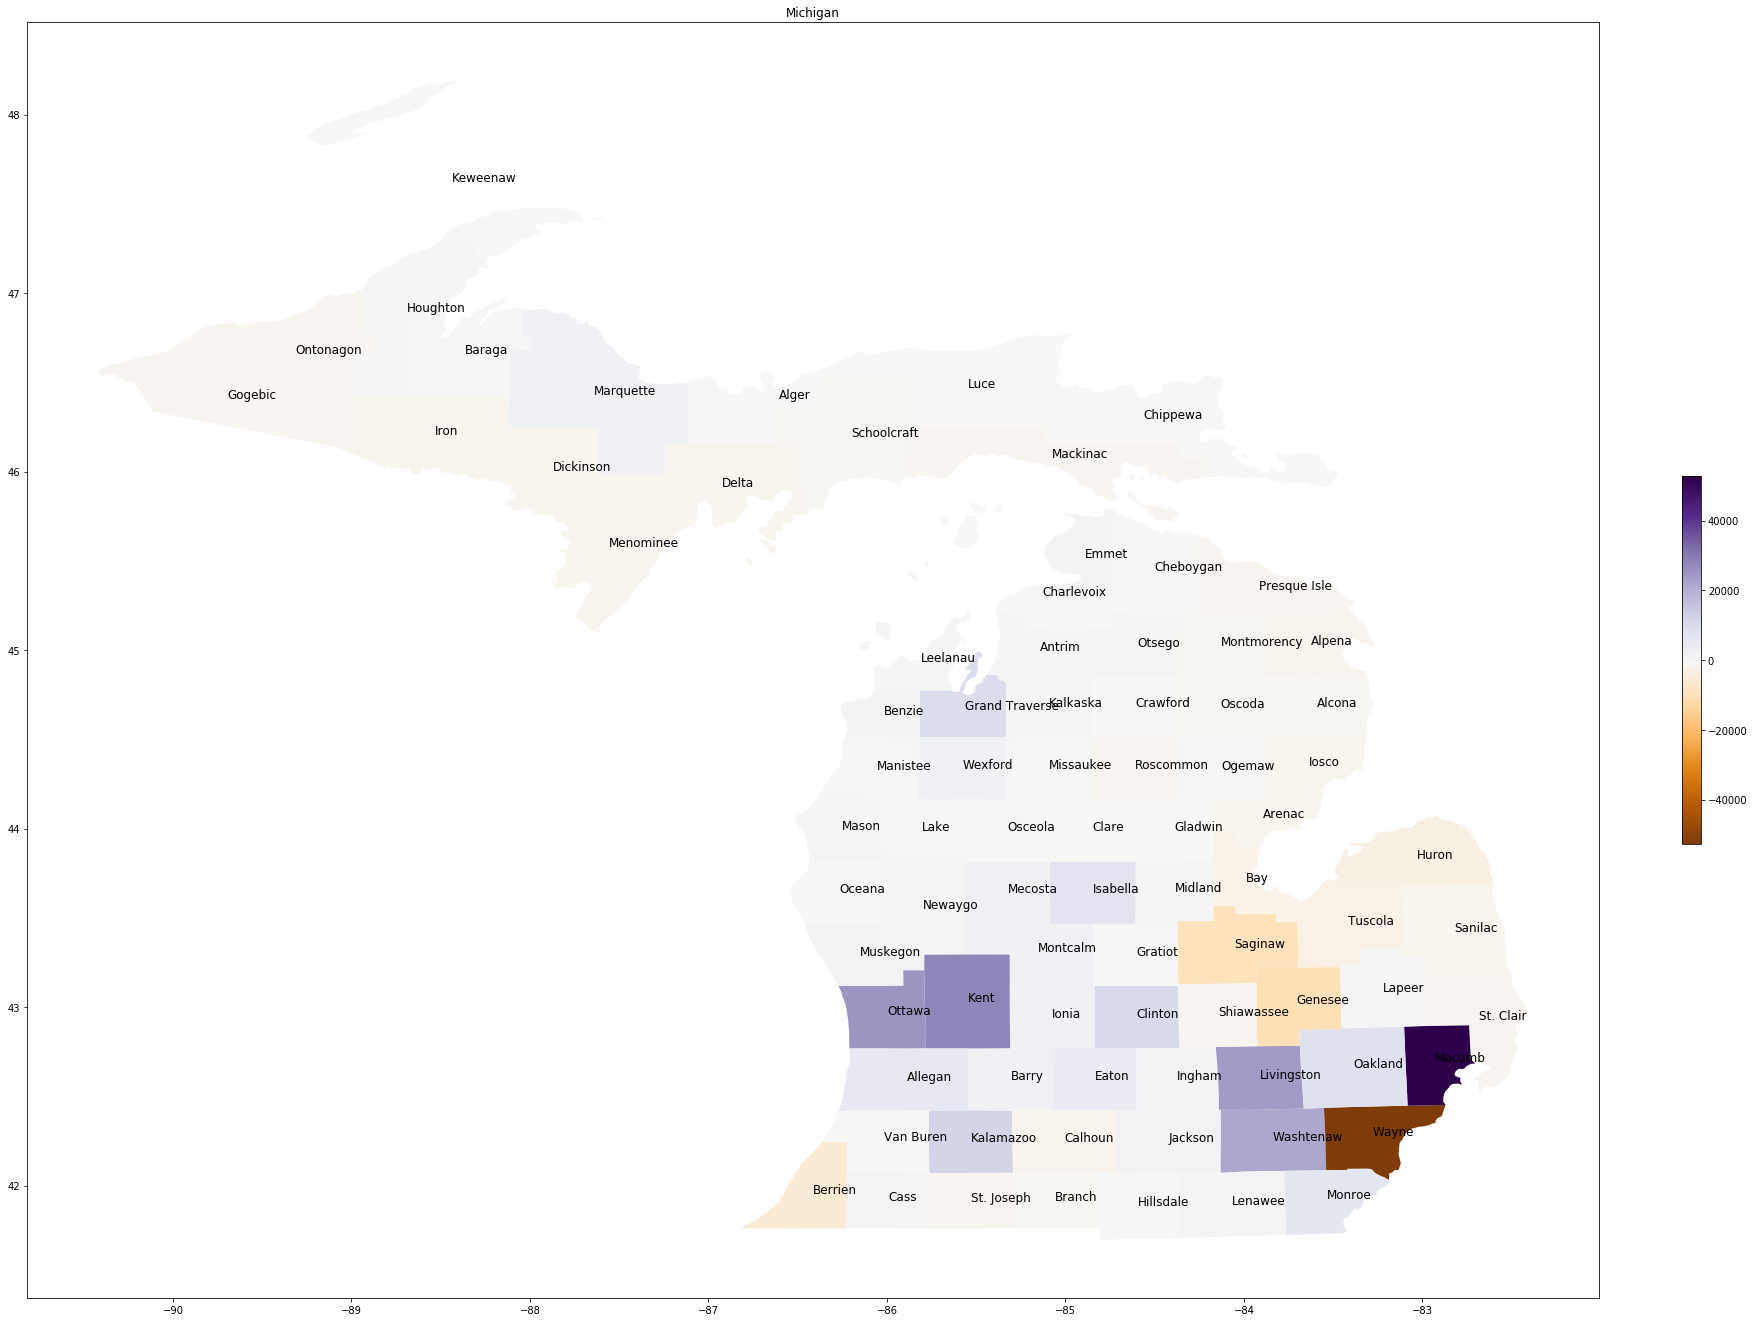

In [26]:
stateplotnamesdiff(merged,'Michigan', colna = 'diff', smap = 'PuOr')

/home/jmurphy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


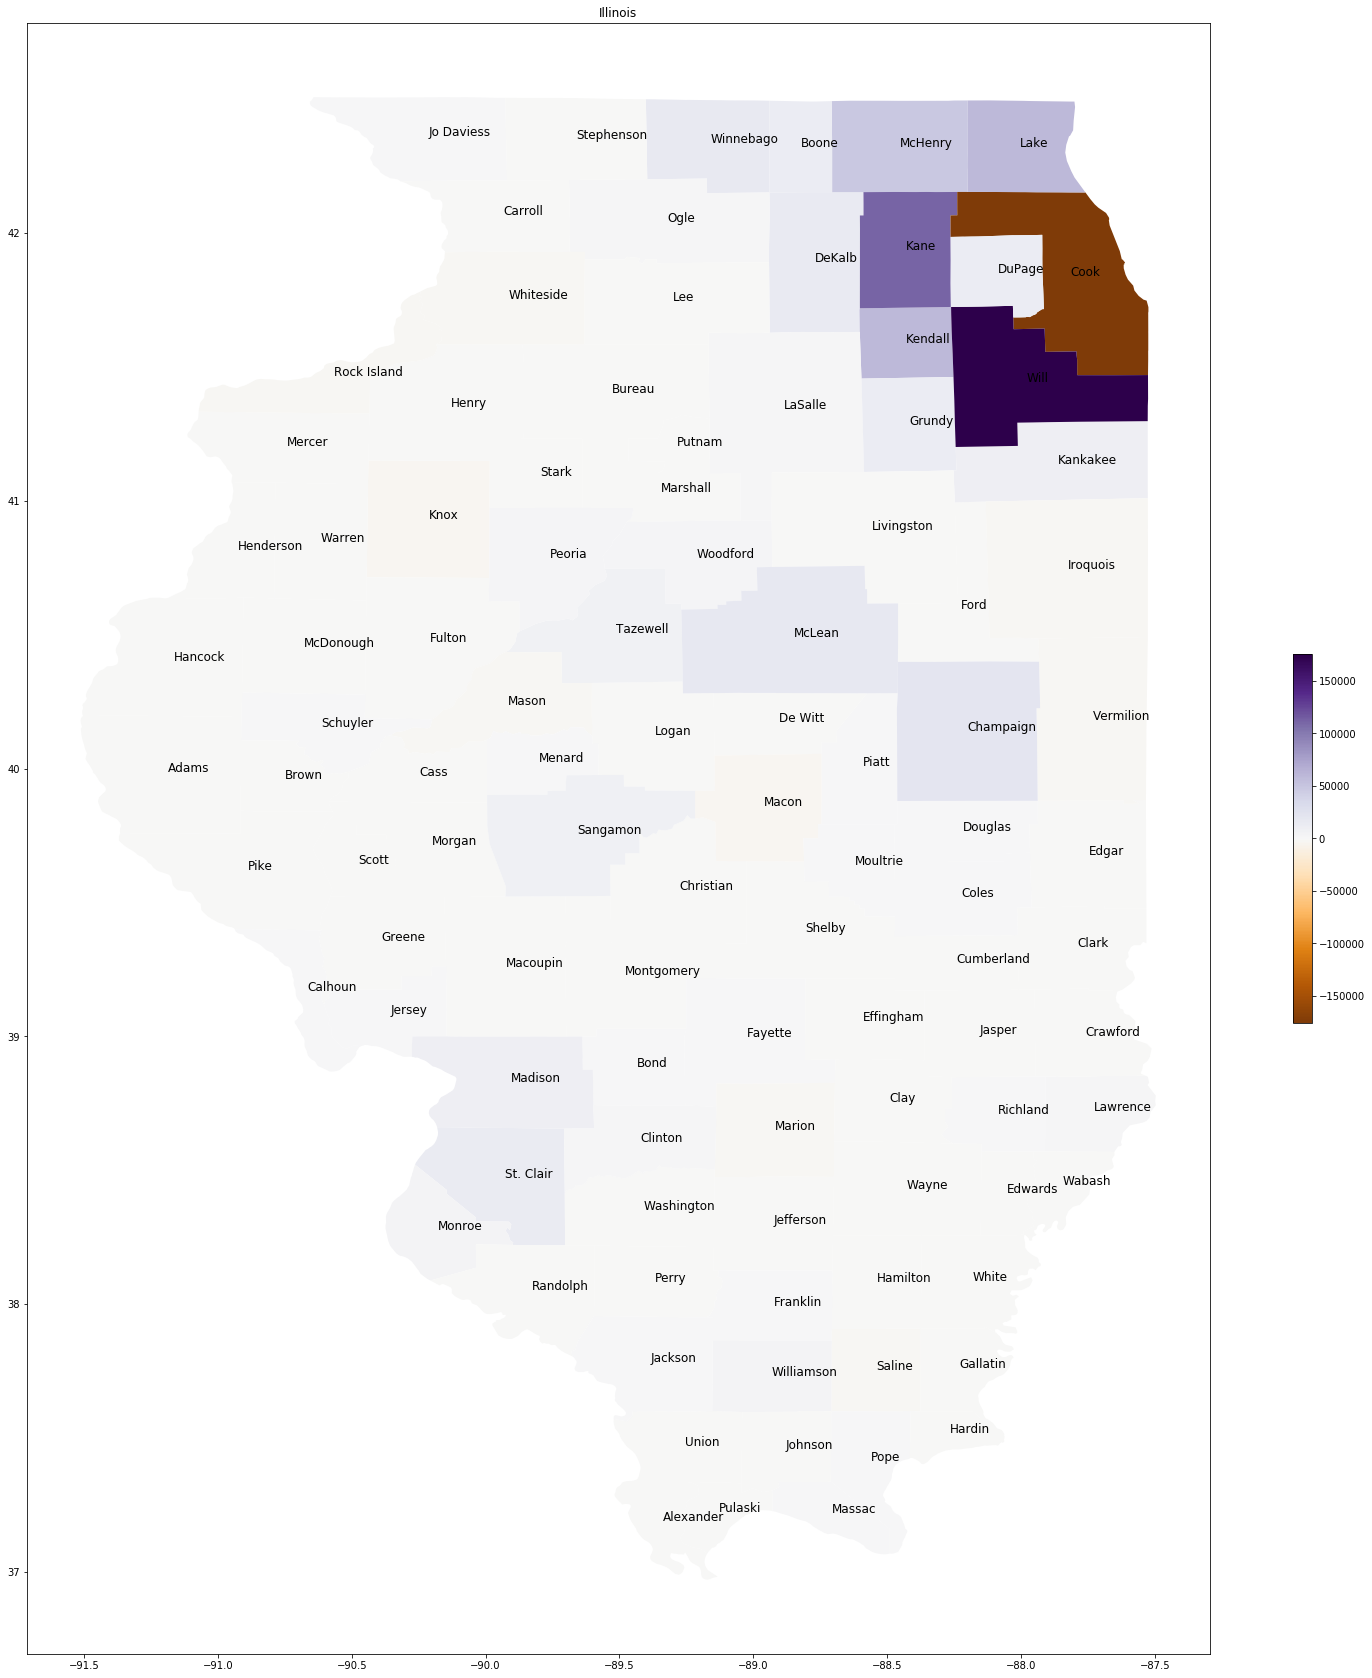

In [27]:
stateplotnamesdiff(merged,'Illinois', colna = 'diff', smap = 'PuOr')

/home/jmurphy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


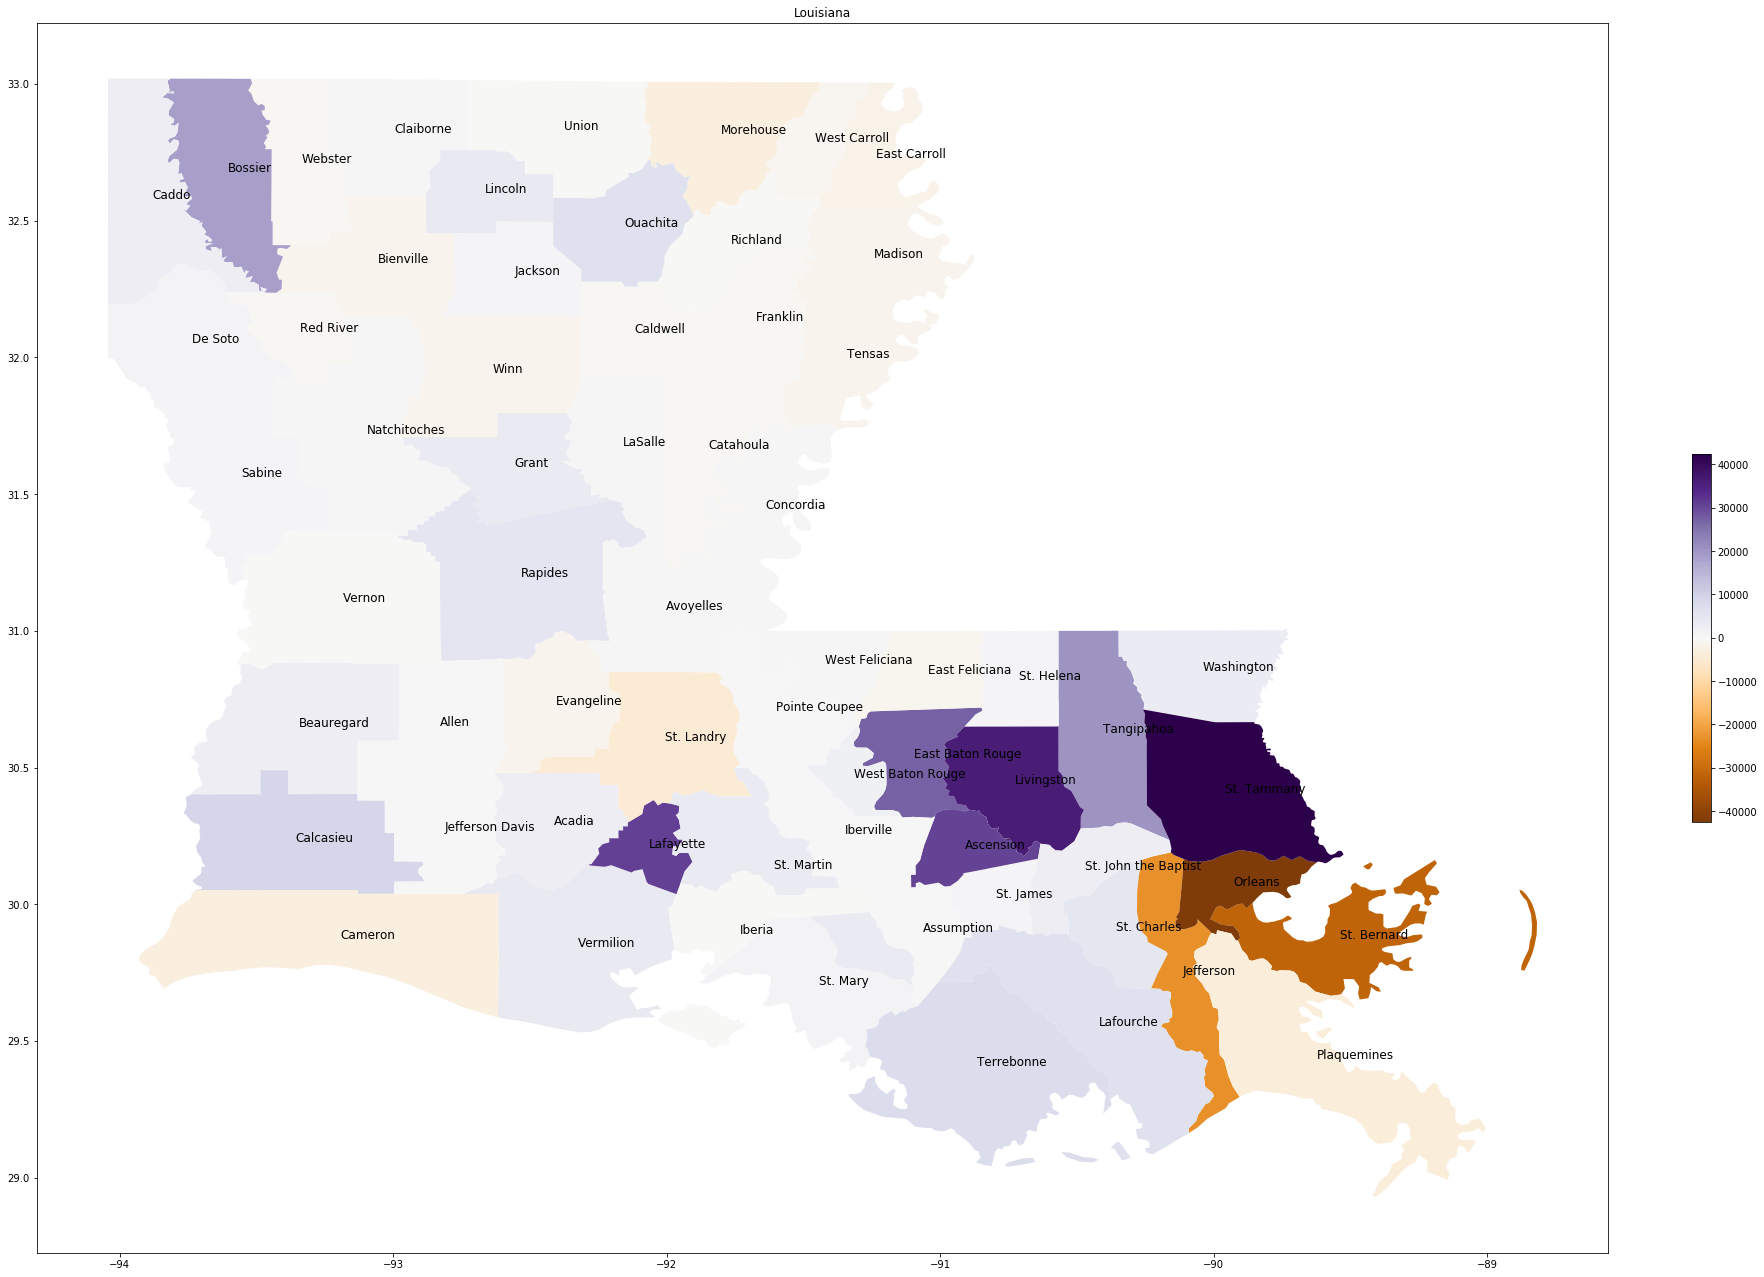

In [28]:
stateplotnamesdiff(merged,'Louisiana', colna = 'diff', smap = 'PuOr')

<p>I hope you have enjoyed my display of population growth between the 2000 Census, and the 2010 Census.</p>